<a href="https://colab.research.google.com/github/prabirdeb/World-Bank-Global-Education-Analysis/blob/main/World_Bank_Global_Education_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

# **Steps of Exploratory Data Analysis (EDA)**

### **1. Connection with the Data**

The World Bank Group is the largest financier of education in the developing world. 

Here, we are provided with 5 datasets about global education statistics.

The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.

Now, we need to **decode the set of experiences** to identify variation of indicators across the globe, which countries are more alike and different.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib 
from sklearn.preprocessing import LabelEncoder

Using matplotlib backend: agg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading the data as pandas dataframe
country_series_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsCountry-Series.csv')
country_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsCountry.csv')
data_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsData.csv')
footnote_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsFootNote.csv')
series_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/World Bank Global Education Analysis-Prabir Debnath/data/EdStatsSeries.csv')

In [4]:
list_of_df=[country_series_df,country_df,data_df,footnote_df,series_df]

### **2. First Feelings of the Data**

Here, the columns are the set of features, showing the way to reach final decoded experience or conclusions.  

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [5]:
country_series_df.head(2)

CountryCode  ... Unnamed: 3
0         ABW  ...        NaN
1         ABW  ...        NaN

[2 rows x 4 columns]

In [6]:
country_df.head(2)

Country Code   Short Name  ... Latest water withdrawal data Unnamed: 31
0          ABW        Aruba  ...                          NaN         NaN
1          AFG  Afghanistan  ...                         2000         NaN

[2 rows x 32 columns]

In [7]:
data_df.head(2)

Country Name Country Code  ... 2100 Unnamed: 69
0   Arab World          ARB  ...  NaN         NaN
1   Arab World          ARB  ...  NaN         NaN

[2 rows x 70 columns]

In [8]:
footnote_df.head(2)

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN

In [9]:
series_df.head(2)

Series Code       Topic  ... License Type Unnamed: 20
0  BAR.NOED.1519.FE.ZS  Attainment  ...          NaN         NaN
1     BAR.NOED.1519.ZS  Attainment  ...          NaN         NaN

[2 rows x 21 columns]

### **3. Deeper Understanding of the Data**

As there is a huge no. of experiences and huge no. of features, we take the help of **statistics to measure** each and every features and thus step by step, we find the most important experiences and features.

“**what gets measured gets done**“.

In [10]:
# Checking Column Names
for i in list_of_df:
  print(i.columns)
  print('\n')

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')


Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')


Index(['Country Name', '

In [11]:
# Checking overall information
for i in list_of_df:
  print(i.info())
  print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 

In [12]:
# Checking the unique values for each column
for i in list_of_df:
  for column_name in i.columns:
    print(colored(f"Unique values for {column_name}:",'blue', attrs=['bold']))
    print(i[column_name].unique())
  print('\n')

Unique values for CountryCode:
['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP'
 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV'
 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MNP'
 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER' 'NGA' 'NIC' 'NLD' 'NOR'
 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'PNG' 'POL' 'PRI' 'PRK'
 'PRT' 'PRY' 'PSE' '

In [13]:
# Checking the no. of unique values in each column
for i in list_of_df:
  print(i.nunique())
  print('\n')


CountryCode    211
SeriesCode      21
DESCRIPTION     97
Unnamed: 3       0
dtype: int64


Country Code                                         241
Short Name                                           241
Table Name                                           241
Long Name                                            241
2-alpha code                                         238
Currency Unit                                        152
Special Notes                                        131
Region                                                 7
Income Group                                           5
WB-2 code                                            240
National accounts base year                           43
National accounts reference year                      11
SNA price valuation                                    2
Lending category                                       3
Other groups                                           2
System of National Accounts                           

**Here, the data set has 46 experiences from 1970 to 2016 with 3,665 statistical indicators (features) for 242 countries**

data_df has 3665*242= 886930 rows 

**Therefore, we will create sub dataframes for all 242 countries and set the years in rows and indicators in column.**

### **4. Cleaning the Data**

Now we can create a clean experience set with important features. 

In this step, we treat the missing values or "?" values through imputation if required.

If there is any string containing a Python literal in any of the important feature, we must evaluate them

We may also create new feature if found important during the analysis.

We check the statistics further on clean data.

In [14]:
data_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [15]:
# Now we can break the data_df into record and target indicators data frames
record_df=data_df[['Country Code','Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016']]
target_df=data_df[['Country Code','Indicator Code',
       '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']]

In [16]:
# checking the no. of null values in each column
record_df.isnull().sum()

Country Code           0
Indicator Code         0
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
1986              847558
1987              848289
1988              848378
1989              849390
1990              762525
1991              812493
1992              811387
1993              811137
1994              809468
1995              755569
1996              810123
1997              813477
1998              802016
1999              768091
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822
2006              746618
2007              749658


In [17]:
# Most of the records have null values. 
# Means we do not have the data of all the indicators for all the countries and years

In [18]:
dict_of_countries=dict(data_df[['Country Code','Country Name']].values)
dict_of_countries.get('ARB')

'Arab World'

In [19]:
dict_of_indicators=dict(data_df[['Indicator Code','Indicator Name']].values)
dict_of_indicators.get('UIS.NERA.2')

'Adjusted net enrolment rate, lower secondary, both sexes (%)'

In [20]:
# Creating filtered record for all individual countries
dict_of_filtered_df={i:record_df.loc[(record_df['Country Code']==i)] for i in list(dict_of_countries.keys())}
for k in list(dict_of_countries.keys()):
  dict_of_filtered_df.get(k).drop(['Country Code'], axis = 1, inplace=True)
  dict_of_filtered_df.get(k).set_index('Indicator Code', inplace=True)
  dict_of_filtered_df.update({k:dict_of_filtered_df.get(k).transpose()})


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
dict_of_filtered_df.get('ARB').head(2)

Indicator Code  UIS.NERA.2  ...  SE.ADT.1524.LT.MA.ZS
1970                   NaN  ...                   NaN
1971                   NaN  ...                   NaN

[2 rows x 3665 columns]

In [22]:
# Checking null values in each of the indicator column for a sample filtered dataframe for a country 
dict_of_filtered_df.get('EMU').isnull().sum()

Indicator Code
UIS.NERA.2              47
UIS.NERA.2.F            47
UIS.NERA.2.GPI          47
UIS.NERA.2.M            47
SE.PRM.TENR              2
                        ..
UIS.LP.AG15T24.M        47
SE.ADT.1524.LT.ZS       47
SE.ADT.1524.LT.FE.ZS    47
SE.ADT.1524.LT.FM.ZS    47
SE.ADT.1524.LT.MA.ZS    47
Length: 3665, dtype: int64

In [23]:
# There are many null values in many of the indicators.
# We will drop the indicators with greater than 50% null values
for k in list(dict_of_filtered_df.keys()):
  new_df=dict_of_filtered_df.get(k)
  for column_name in new_df.columns:
    if new_df[column_name].isnull().sum()>=23:
      new_df.drop([column_name],axis=1,inplace=True)
  dict_of_filtered_df.update({k:new_df})


In [24]:
dict_of_filtered_df.get('EMU').isnull().sum()

Indicator Code
SE.PRM.TENR           2
SE.PRM.TENR.FE        2
UIS.NERA.1.GPI        2
SE.PRM.TENR.MA        2
UIS.NIRA.1            2
                     ..
UIS.NERT.2            7
UIS.NERT.1.GPI        3
SL.UEM.TOTL.FE.ZS    21
SL.UEM.TOTL.MA.ZS    21
SL.UEM.TOTL.ZS       21
Length: 212, dtype: int64

In [25]:
dict_of_filtered_df.get('EMU').describe()

Indicator Code  SE.PRM.TENR  SE.PRM.TENR.FE  ...  SL.UEM.TOTL.MA.ZS  SL.UEM.TOTL.ZS
count             45.000000       45.000000  ...          26.000000       26.000000
mean              97.490471       97.638287  ...           9.039103        9.996547
std                1.370463        1.227734  ...           1.508504        1.383525
min               95.223793       95.724380  ...           6.631407        7.471680
25%               96.424889       96.683052  ...           7.754366        9.035563
50%               97.030411       97.269142  ...           9.256528       10.066453
75%               99.046333       98.999840  ...          10.089165       11.352037
max               99.352272       99.432869  ...          11.897115       11.992408

[8 rows x 212 columns]

In [26]:
# Imputation with median
for k in list(dict_of_filtered_df.keys()):
  new_df=dict_of_filtered_df.get(k)
  for column_name in new_df.columns:
    new_df[column_name]=new_df[column_name].fillna(new_df[column_name].median())
  dict_of_filtered_df.update({k:new_df})

In [27]:
dict_of_filtered_df.get('EMU').isnull().sum()

Indicator Code
SE.PRM.TENR          0
SE.PRM.TENR.FE       0
UIS.NERA.1.GPI       0
SE.PRM.TENR.MA       0
UIS.NIRA.1           0
                    ..
UIS.NERT.2           0
UIS.NERT.1.GPI       0
SL.UEM.TOTL.FE.ZS    0
SL.UEM.TOTL.MA.ZS    0
SL.UEM.TOTL.ZS       0
Length: 212, dtype: int64

### **5. Detecting Anomalies in the Data**

While, we are finding out the **general formula** from the experiences, we should identify the outlier or **exceptional observations** for all the important features and keep them aside during the analysis.

### **6. Visualizing the Data**

When we know all the important features of our experiences, we can go a step ahead by finding the relationship among features. Here, we take the help of visualization because

**"A picture is worth a thousand words"**

In [41]:
dict_of_countries.get('EMU')

'Euro area'

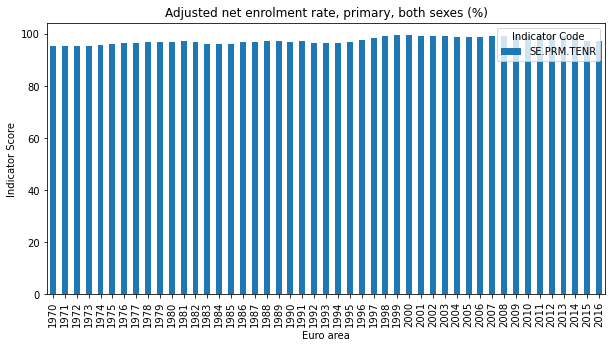

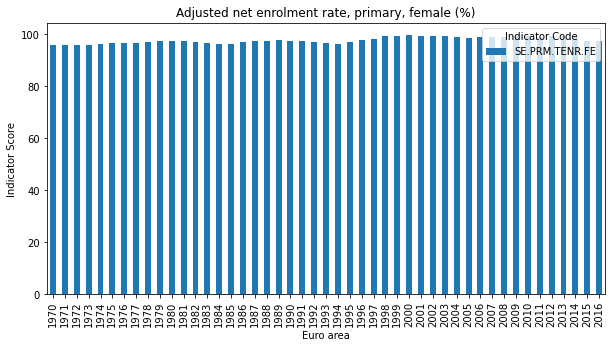

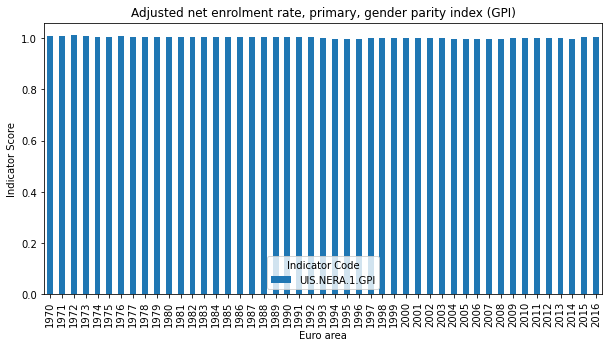

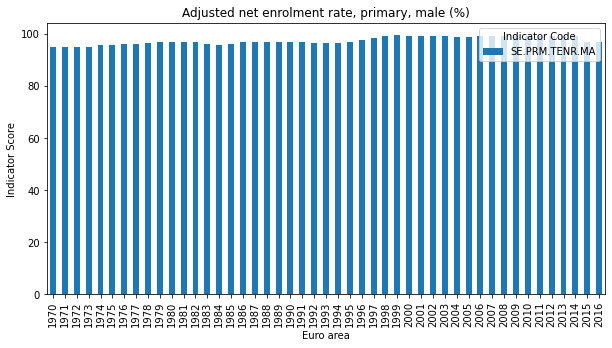

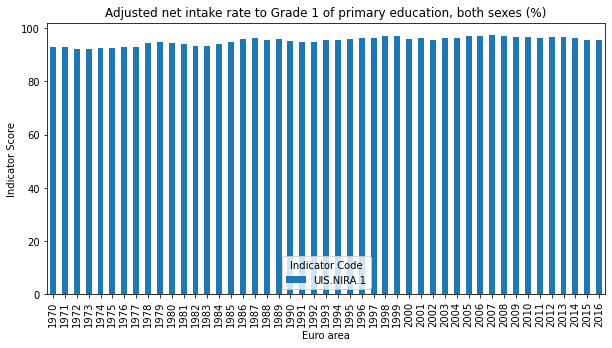

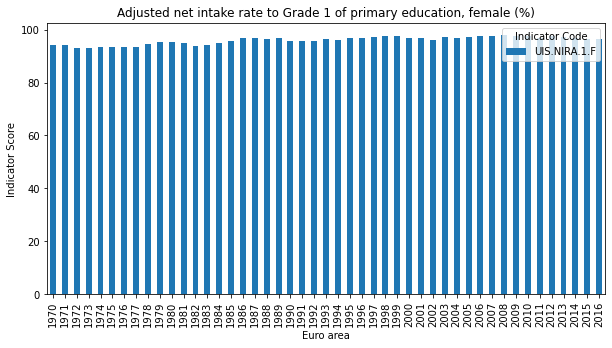

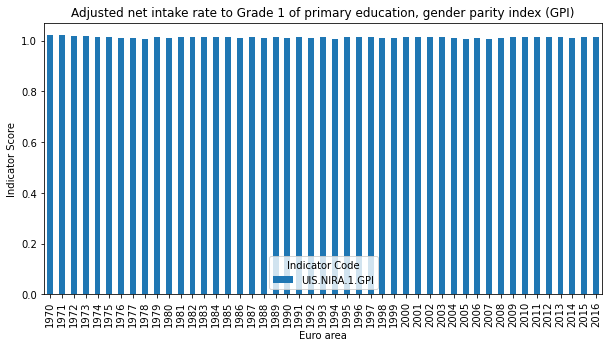

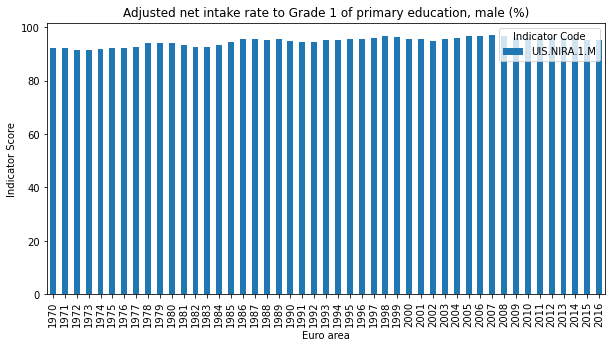

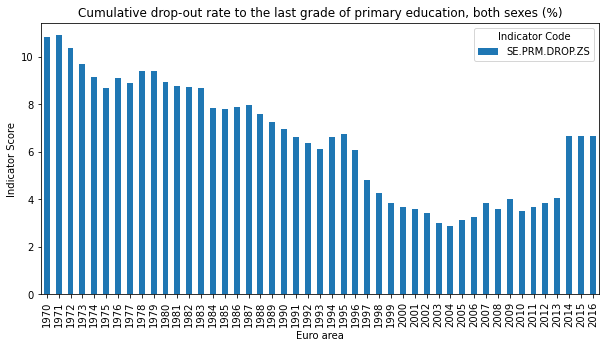

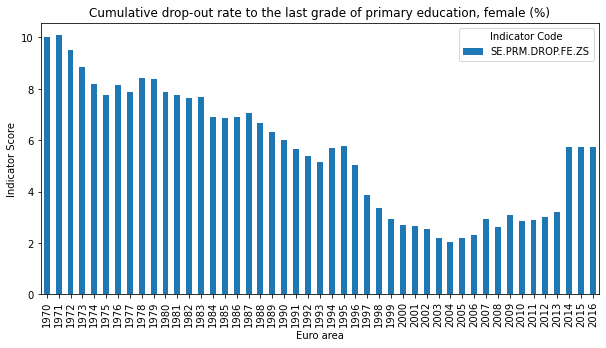

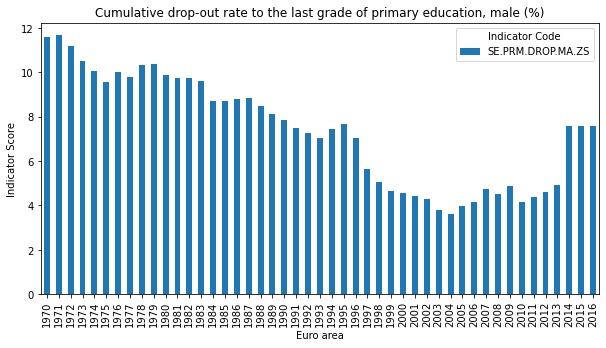

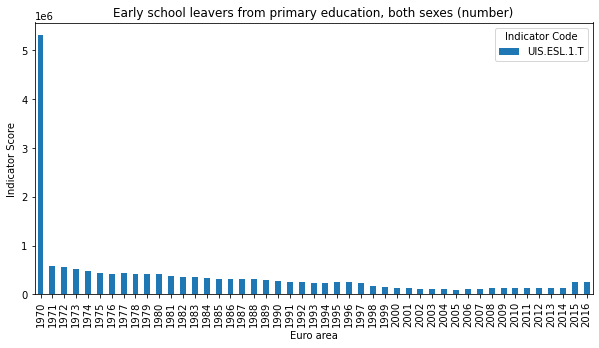

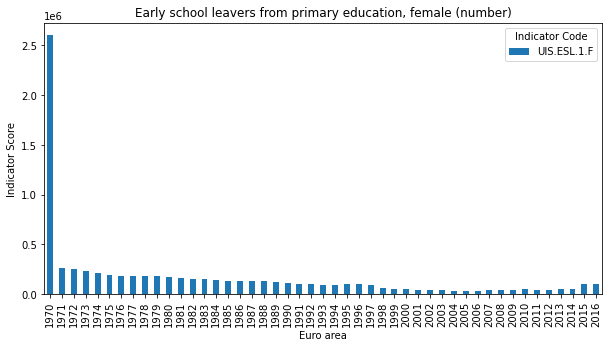

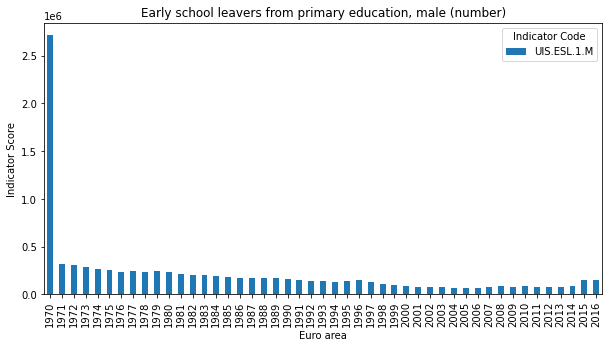

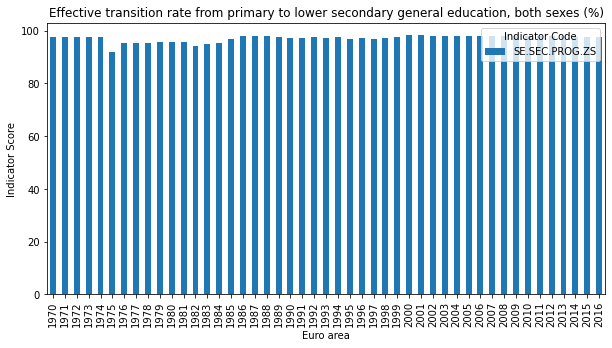

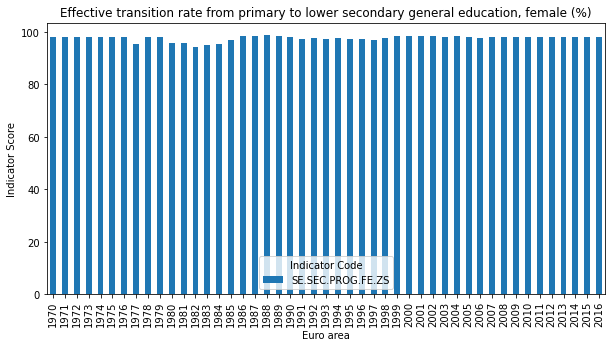

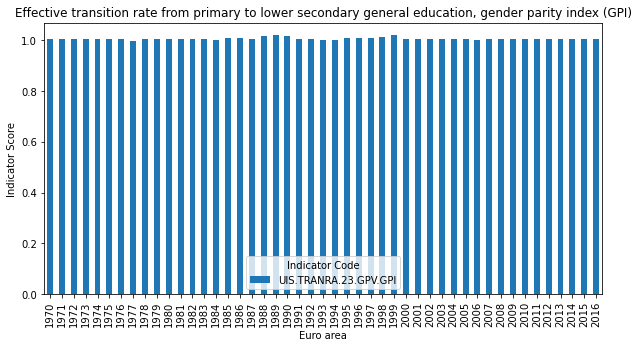

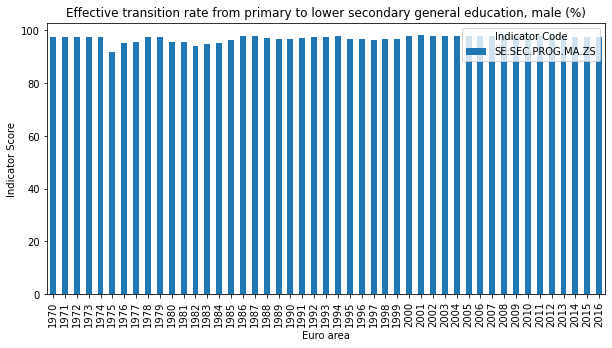

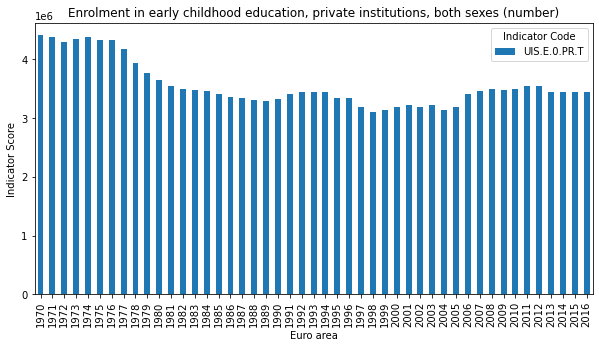

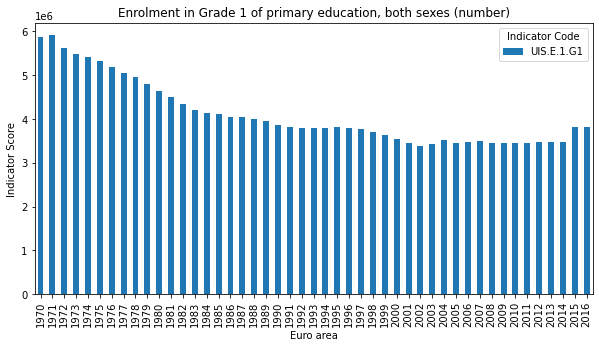

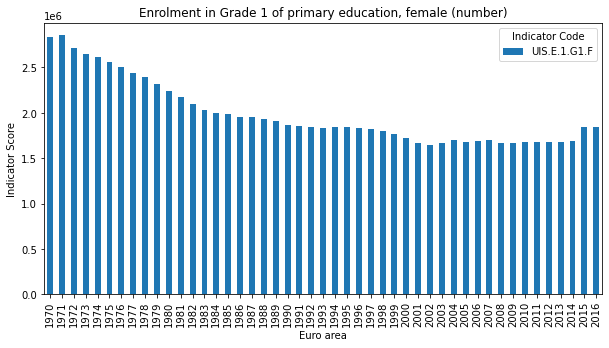

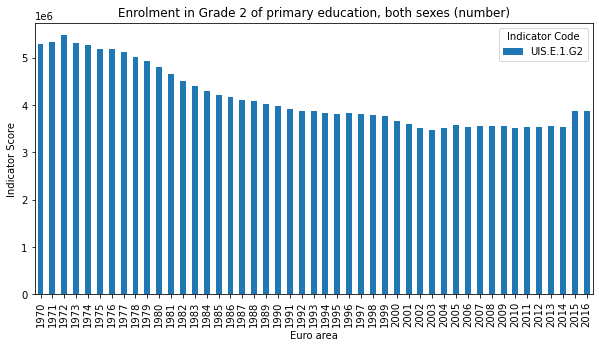

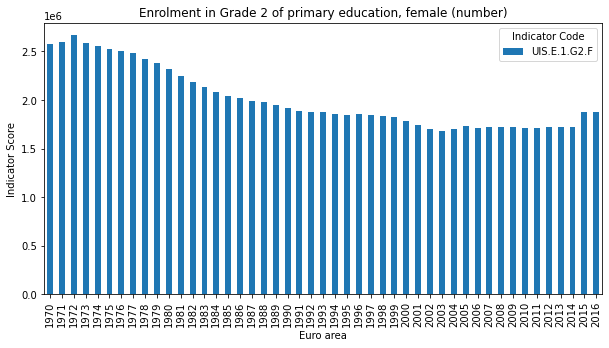

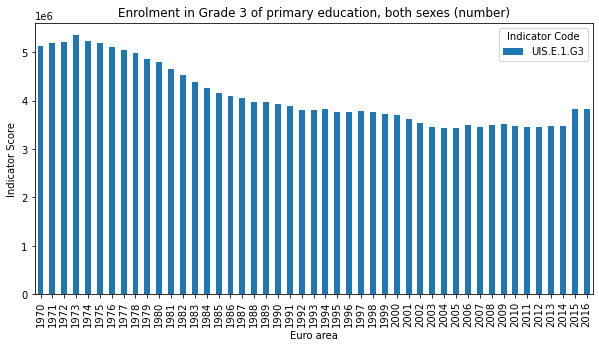

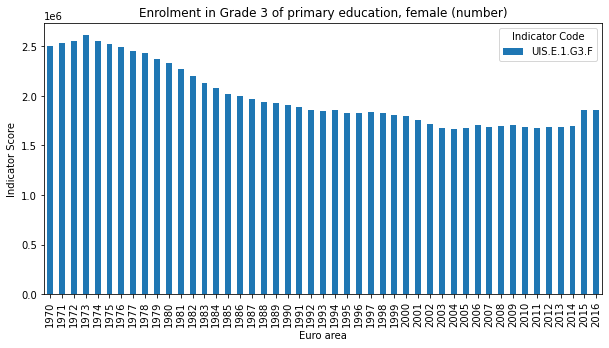

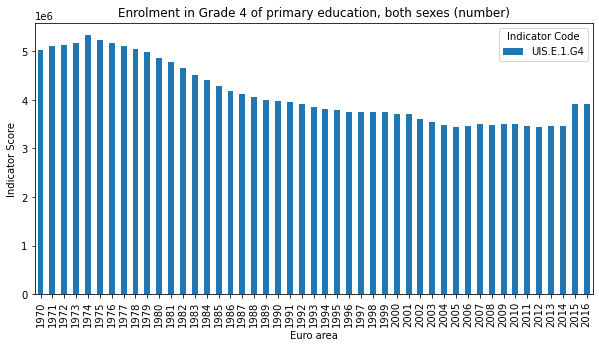

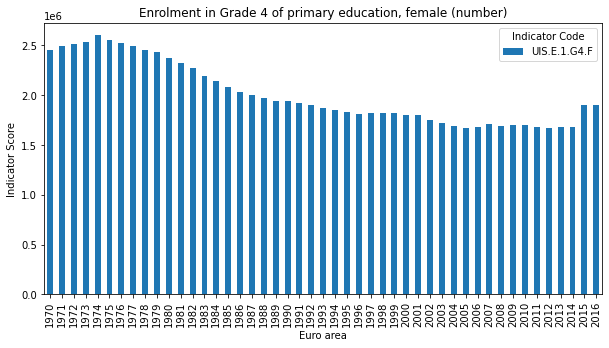

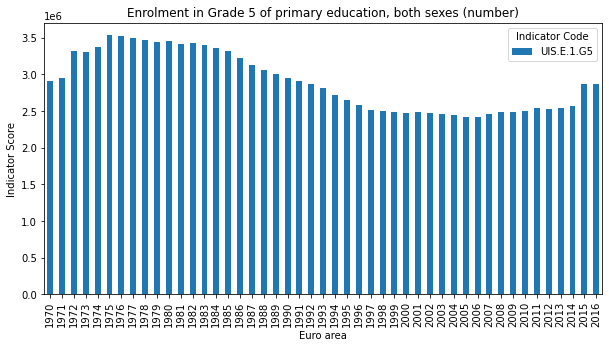

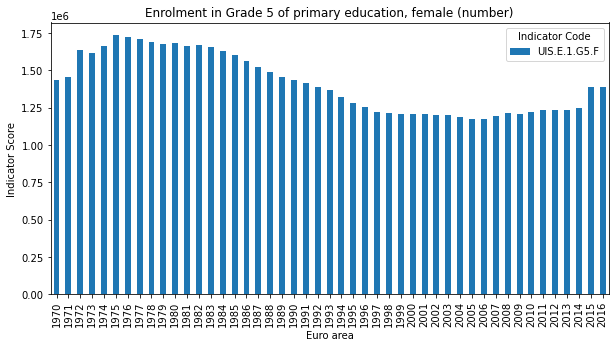

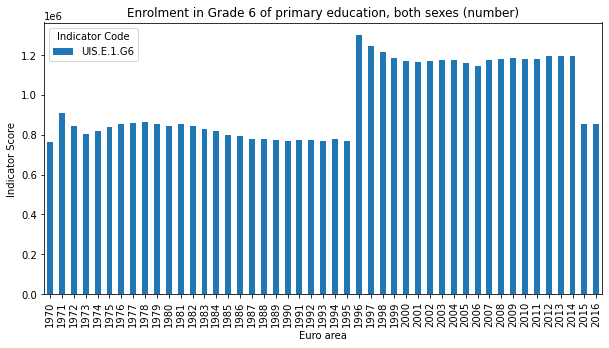

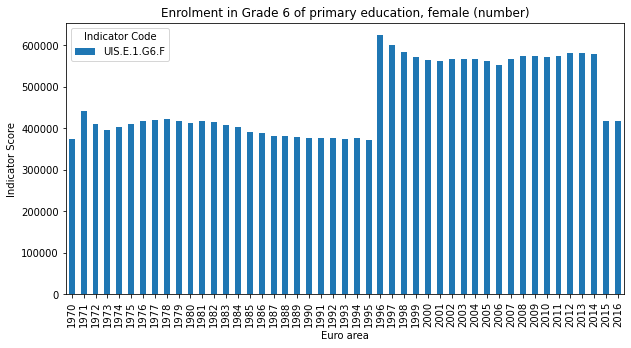

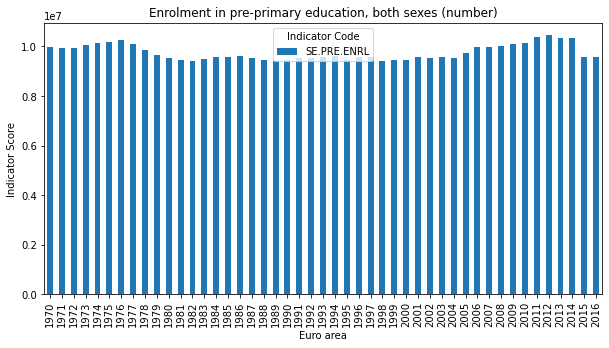

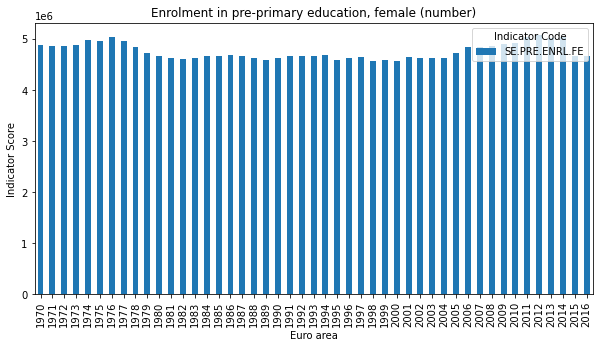

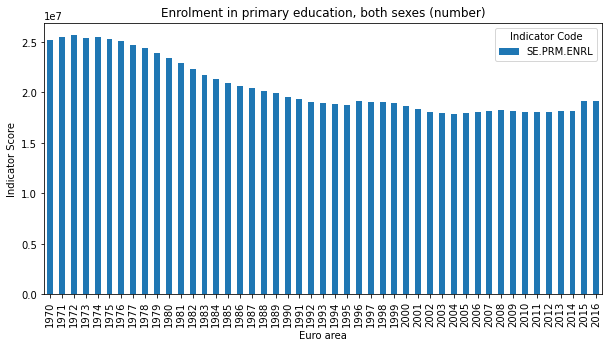

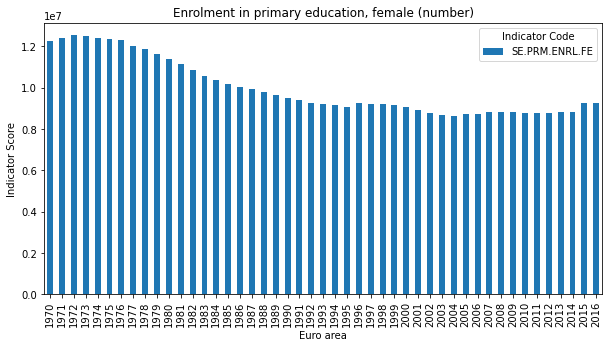

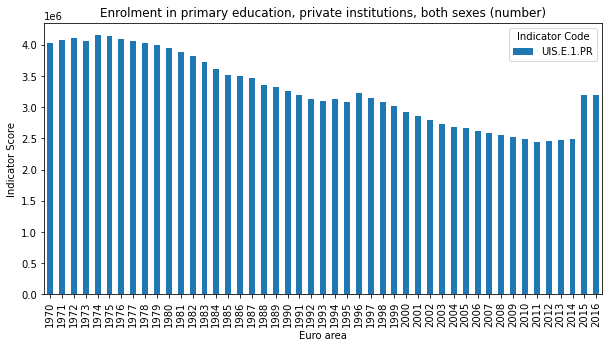

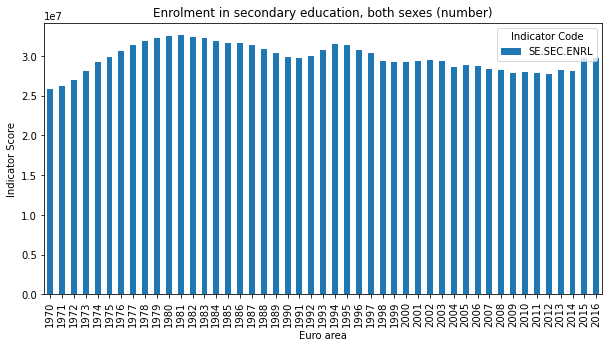

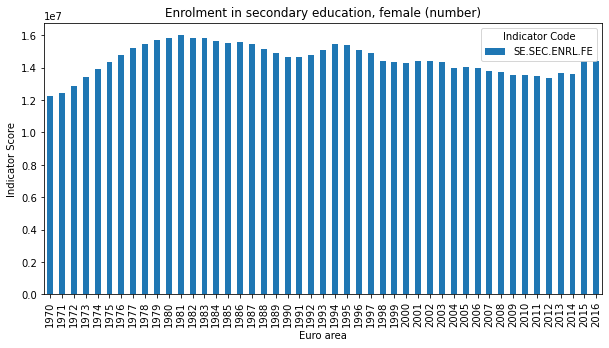

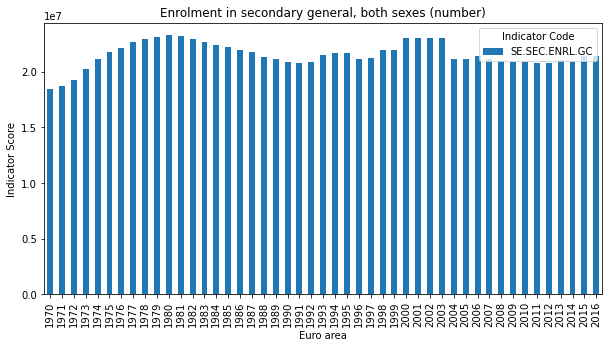

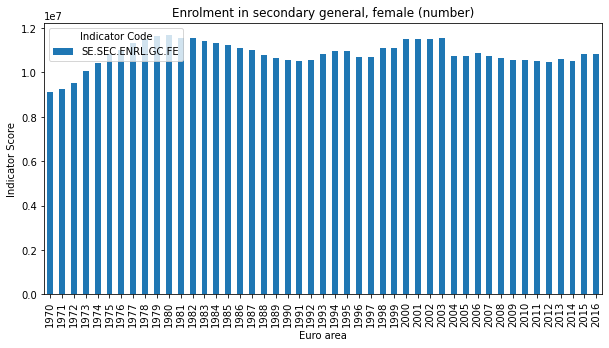

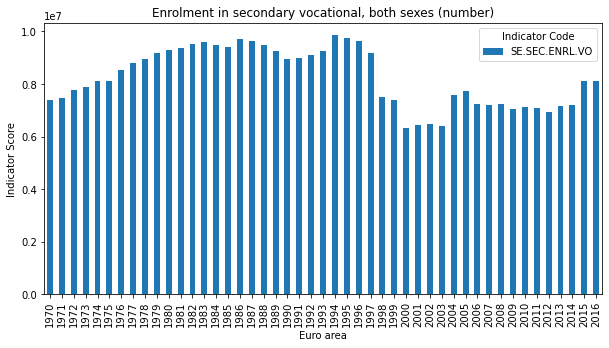

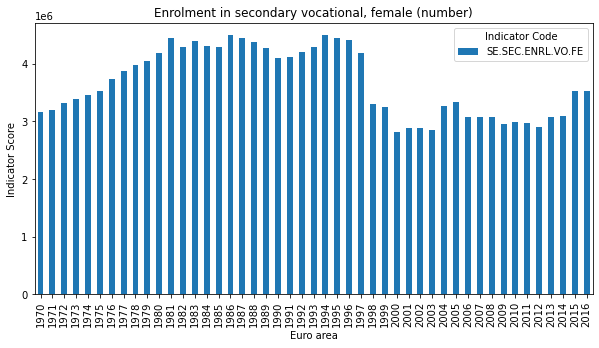

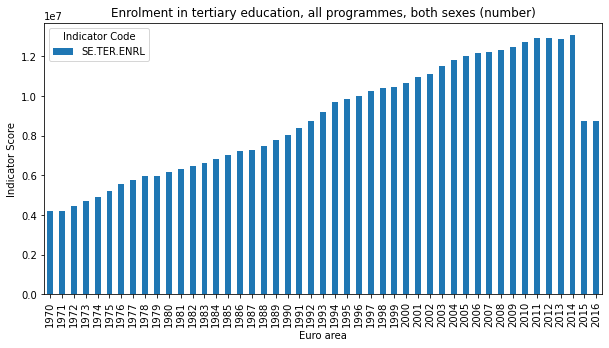

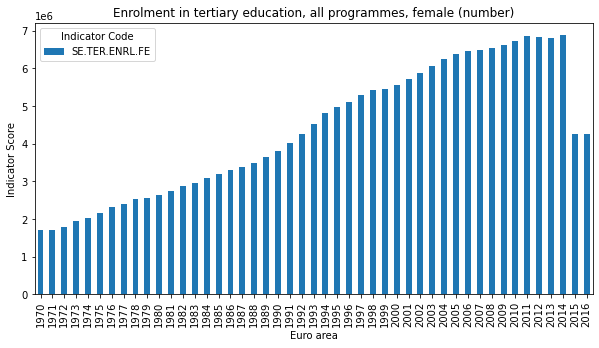

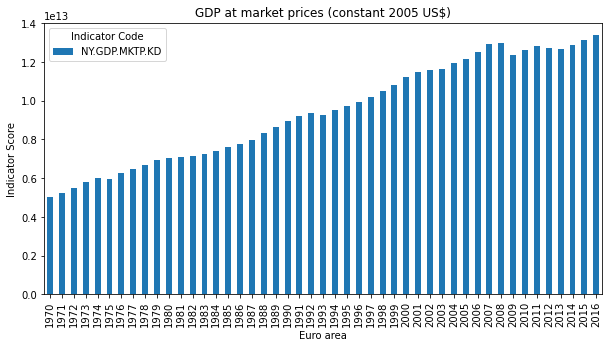

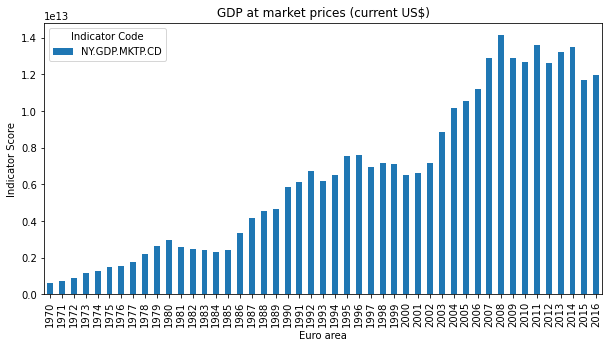

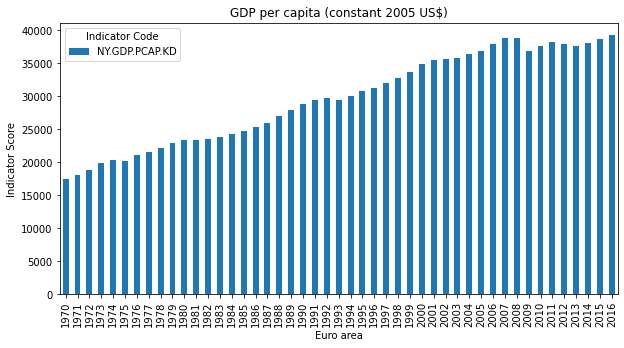

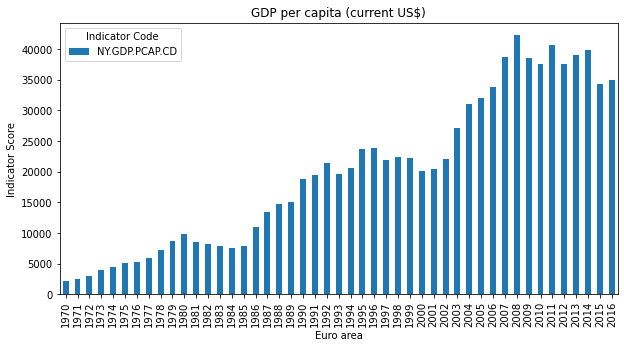

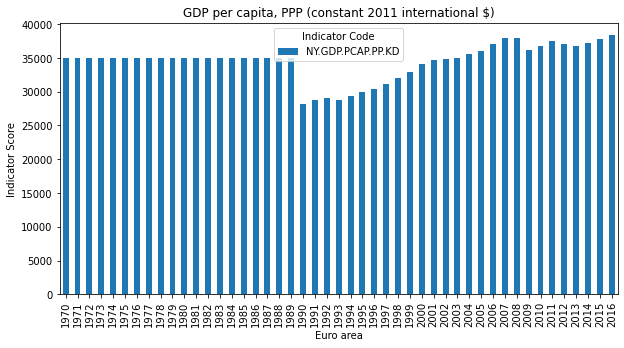

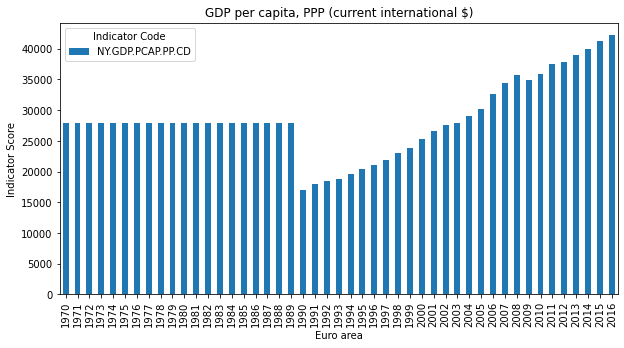

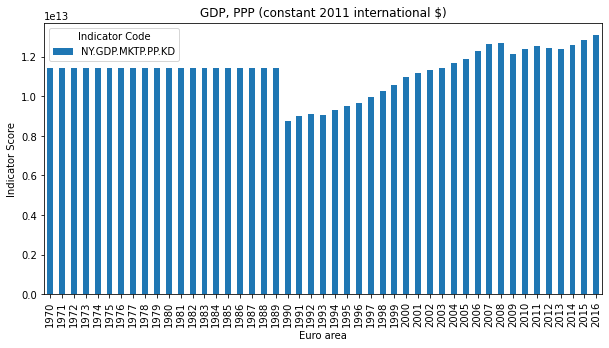

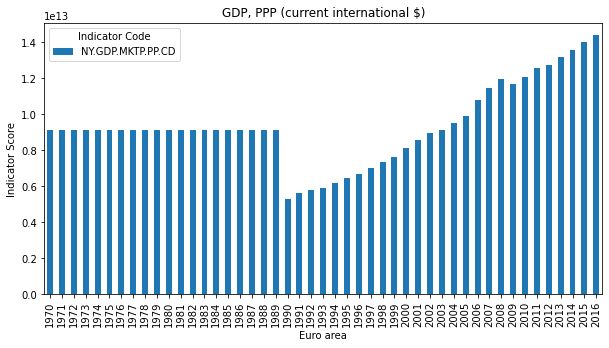

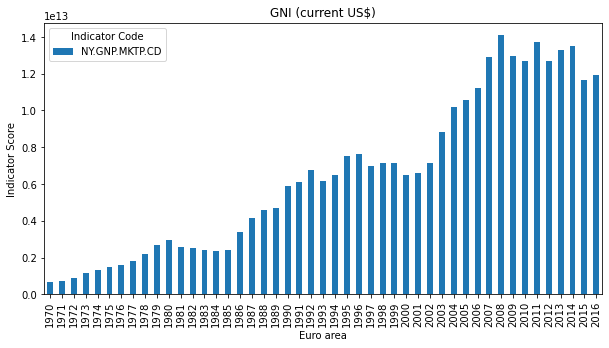

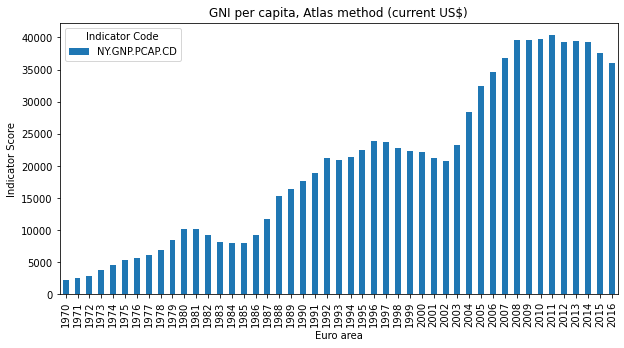

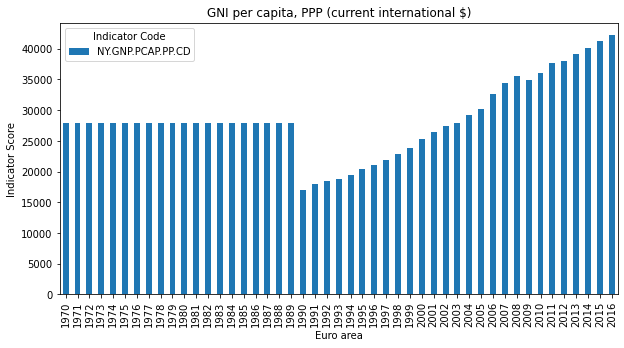

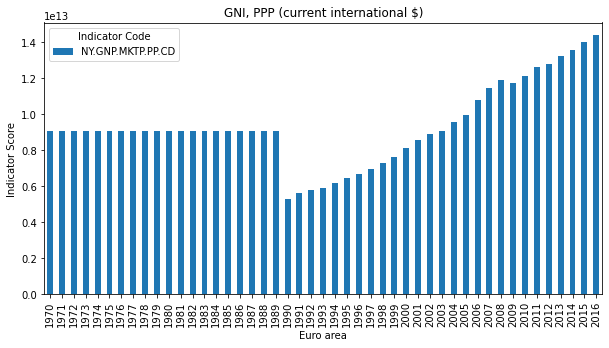

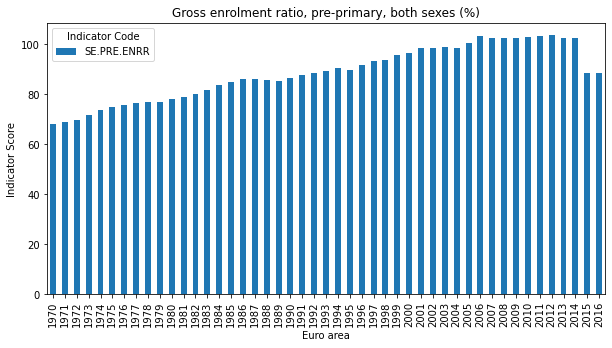

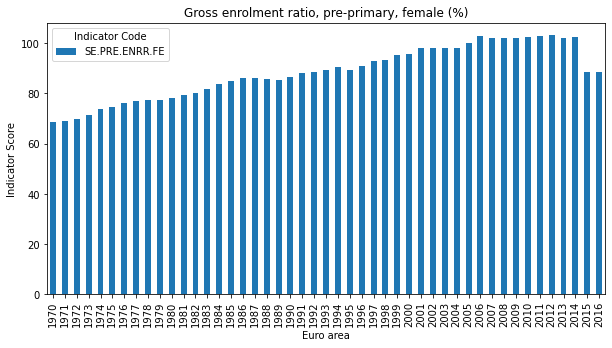

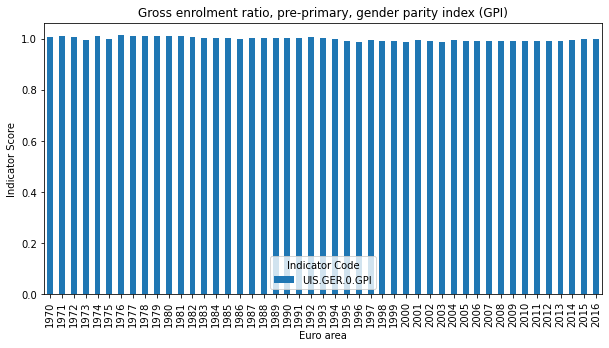

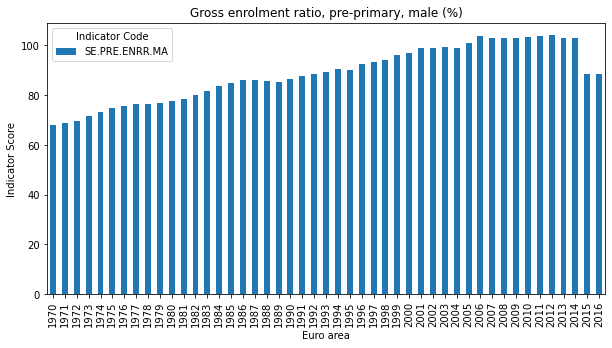

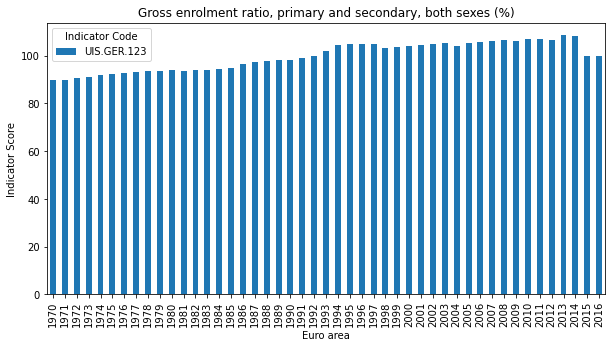

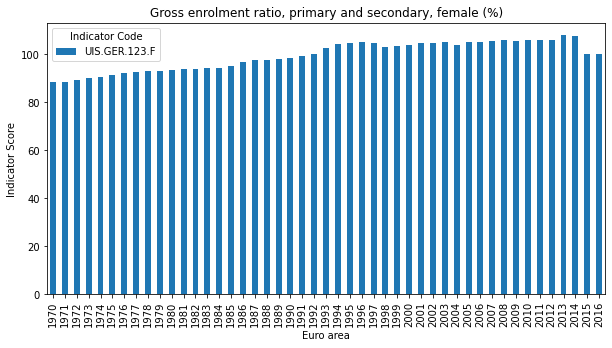

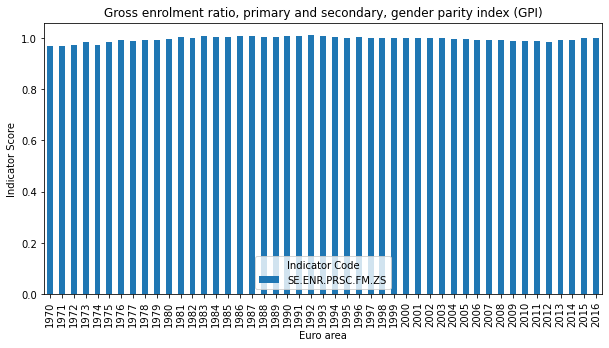

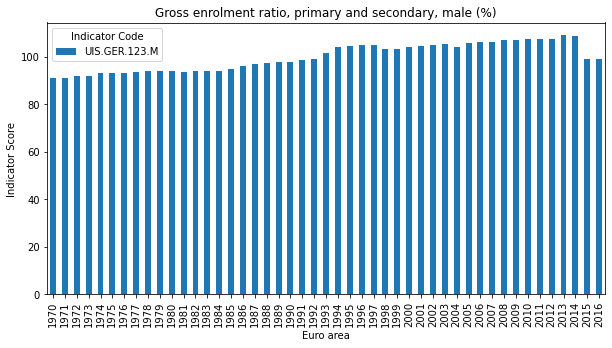

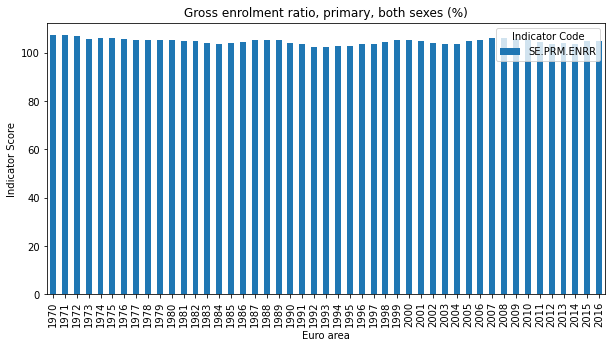

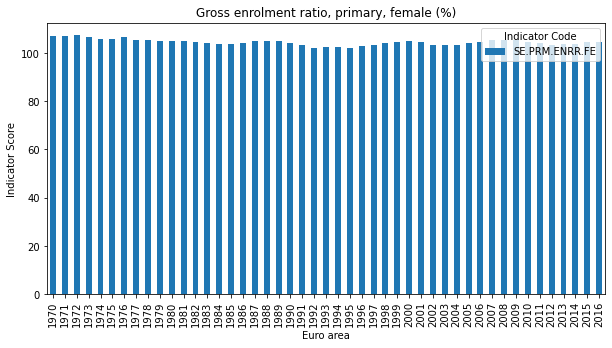

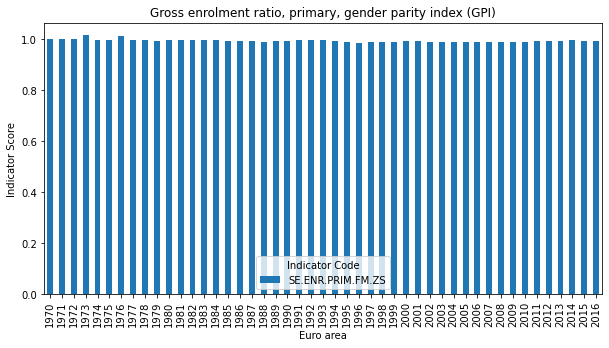

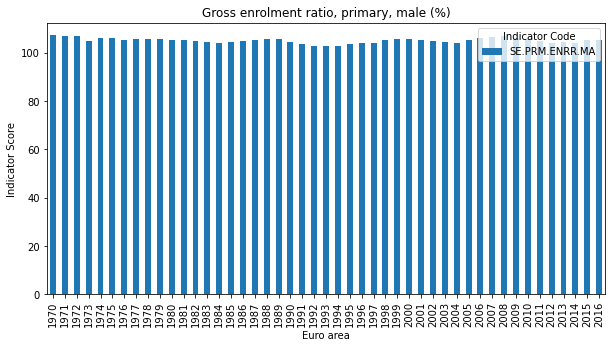

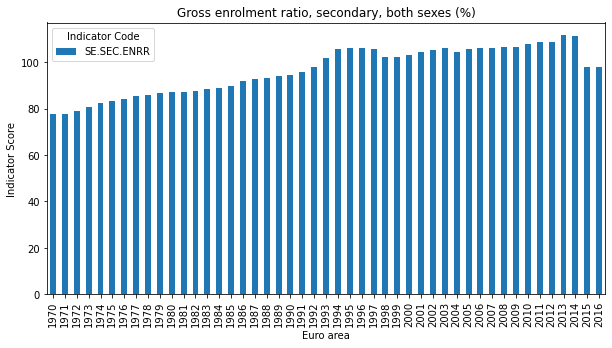

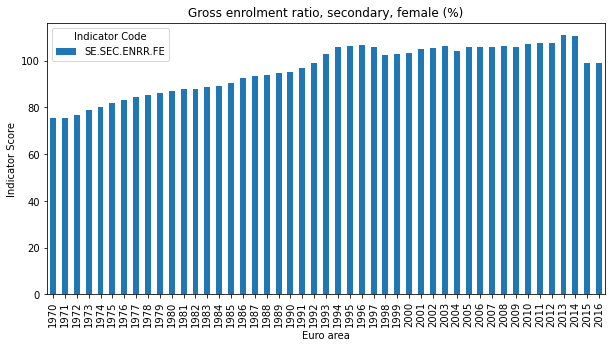

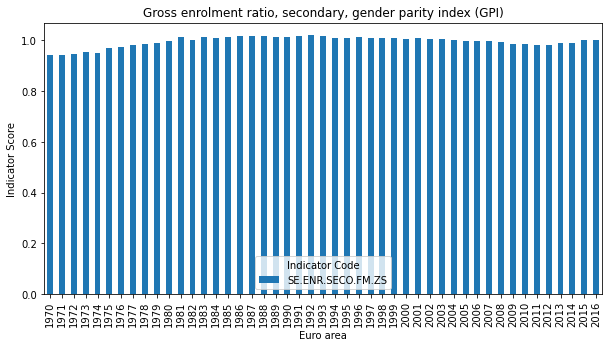

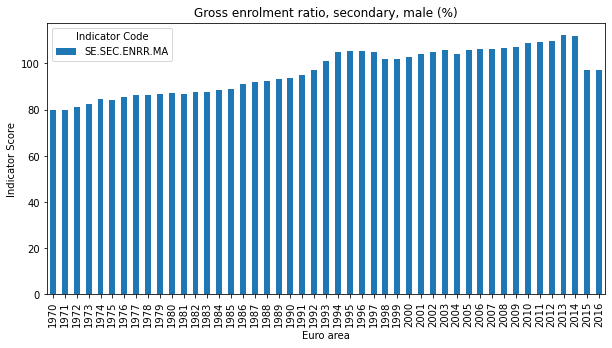

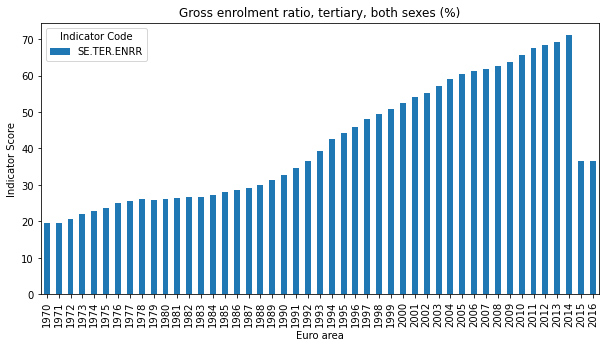

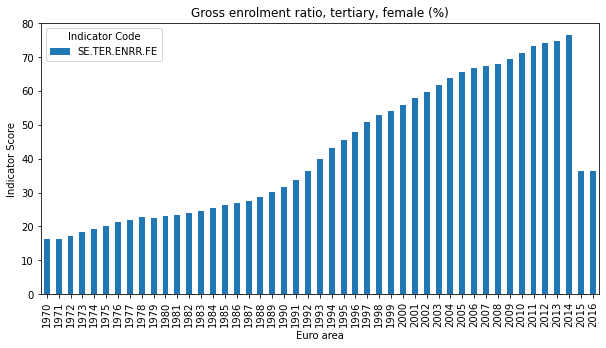

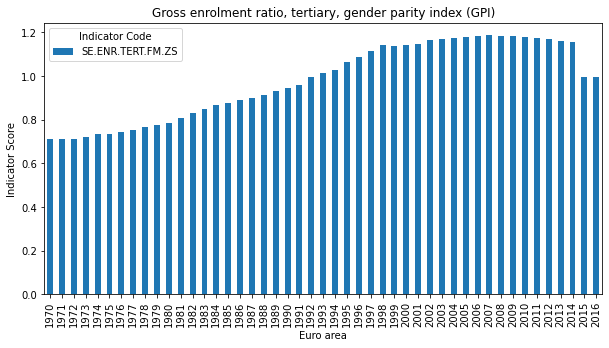

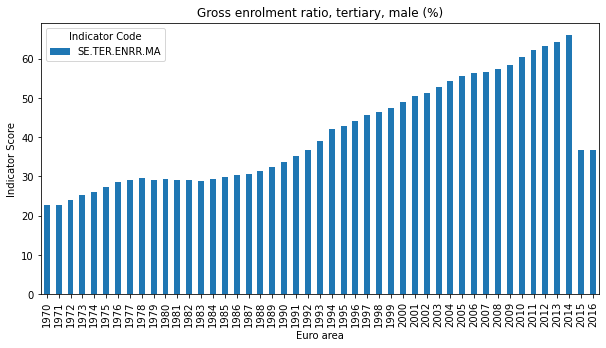

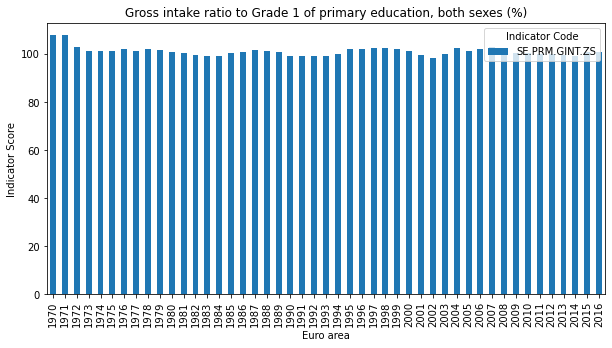

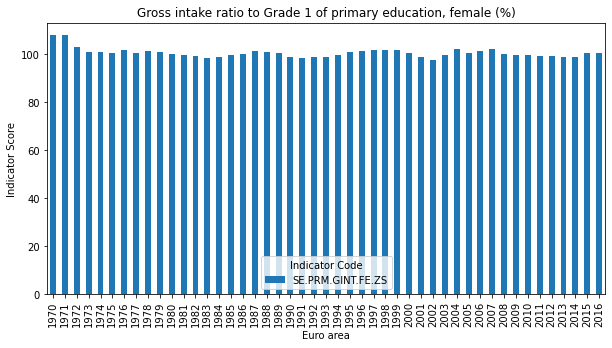

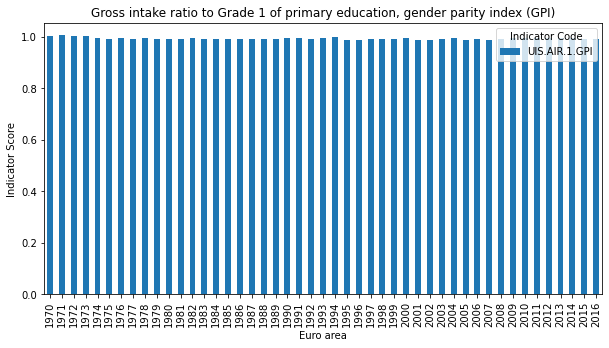

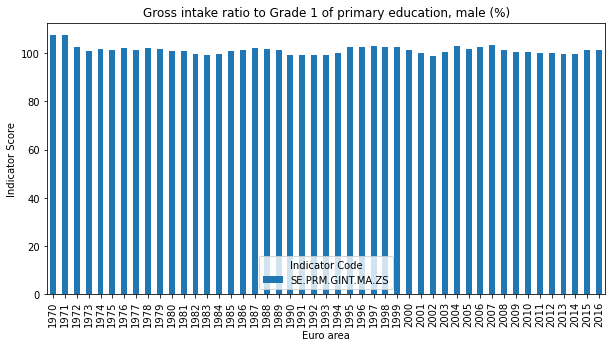

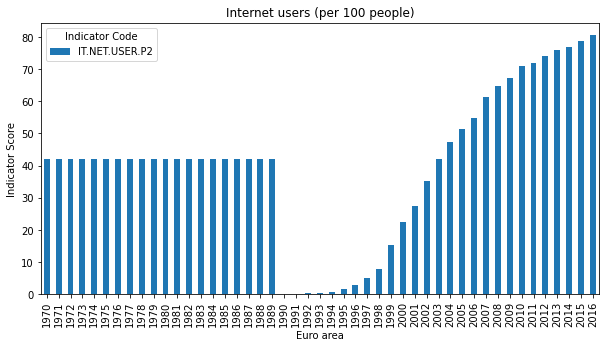

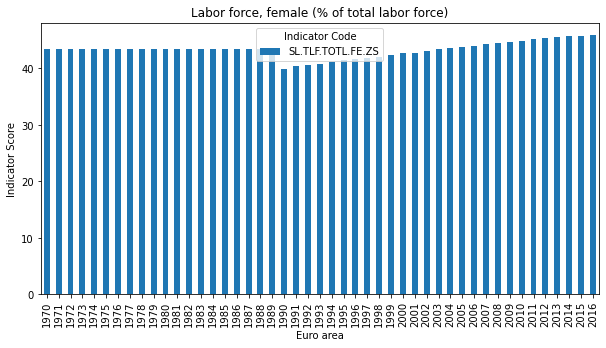

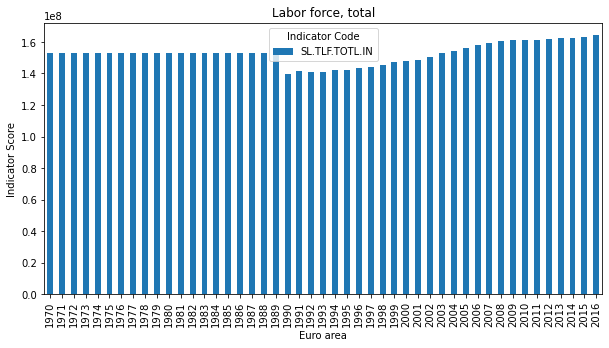

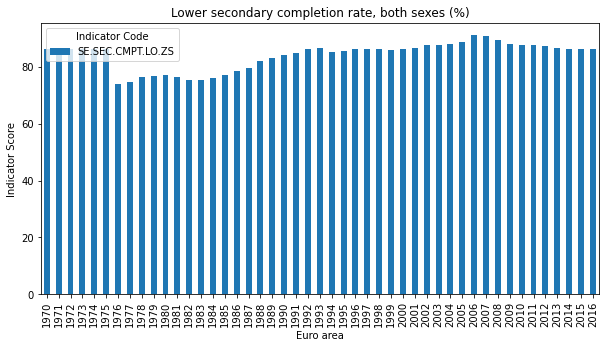

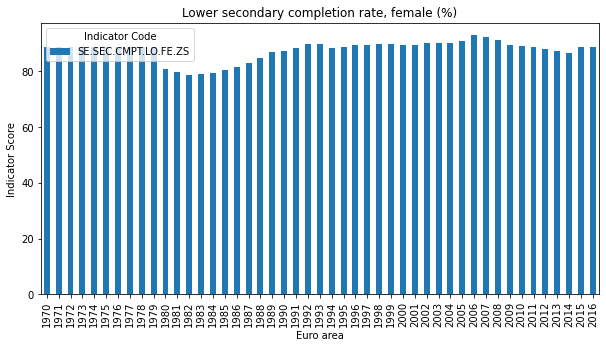

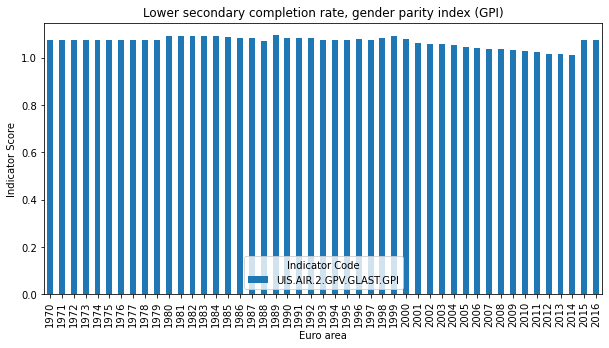

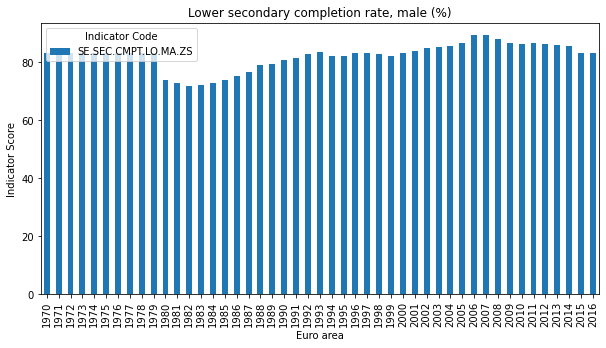

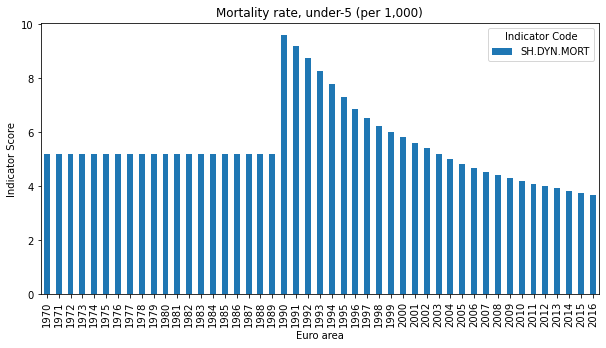

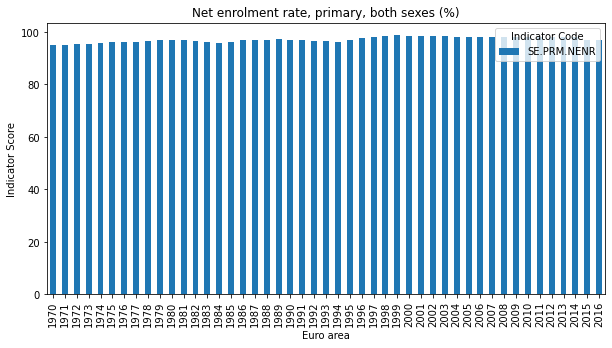

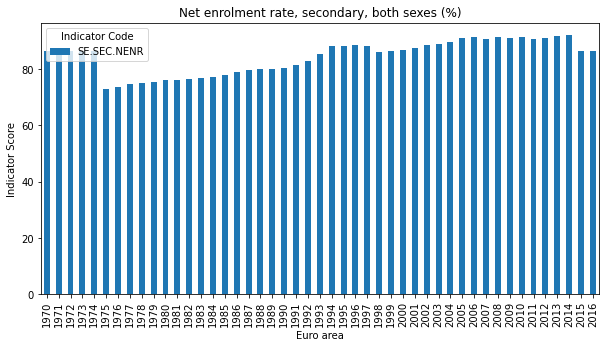

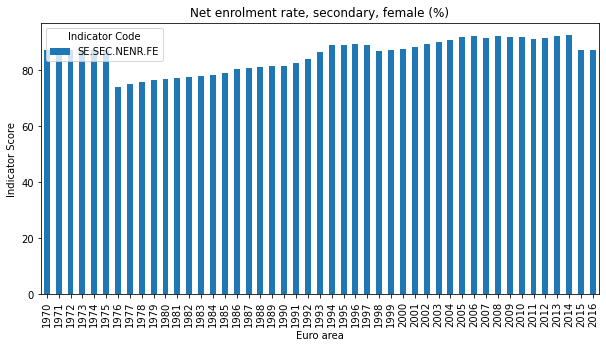

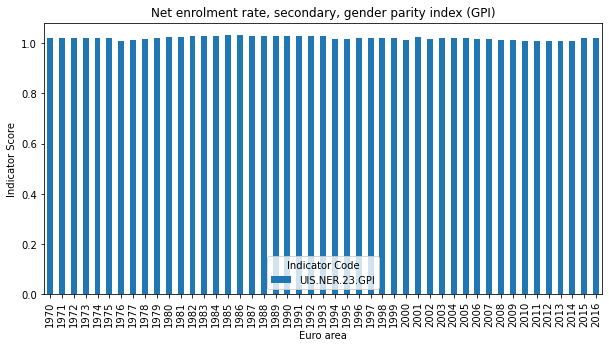

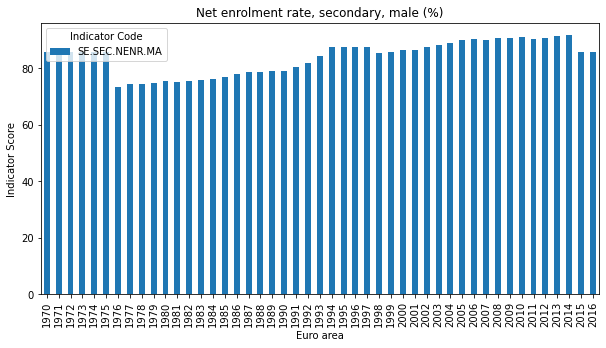

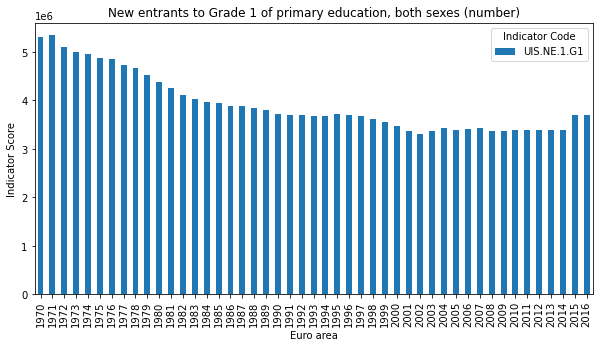

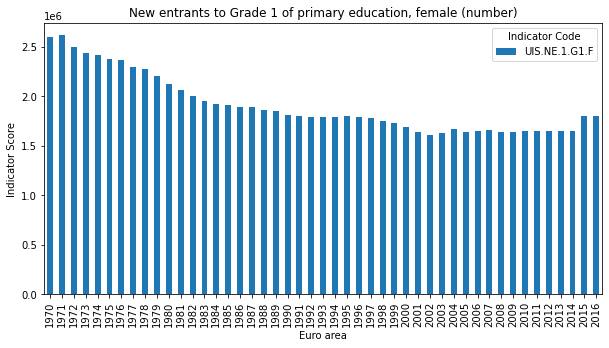

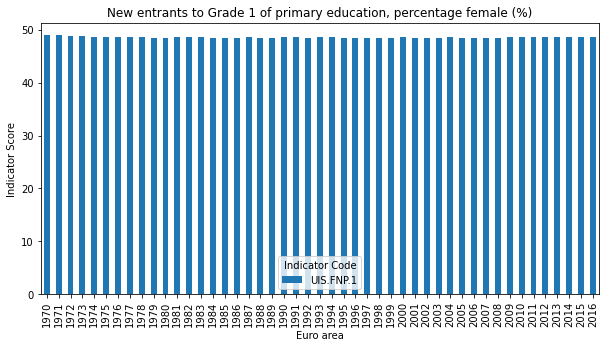

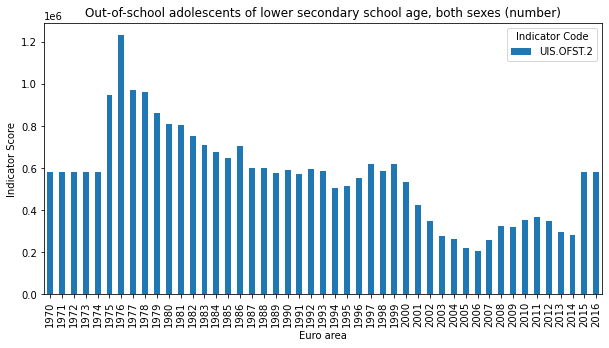

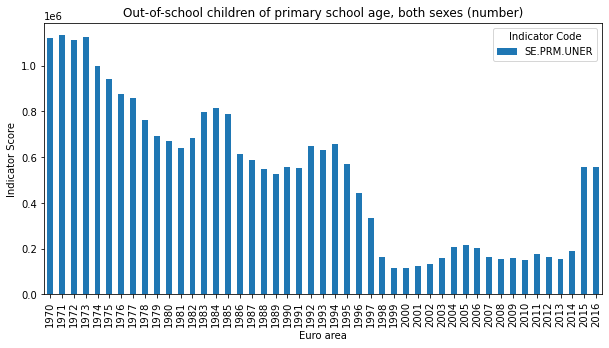

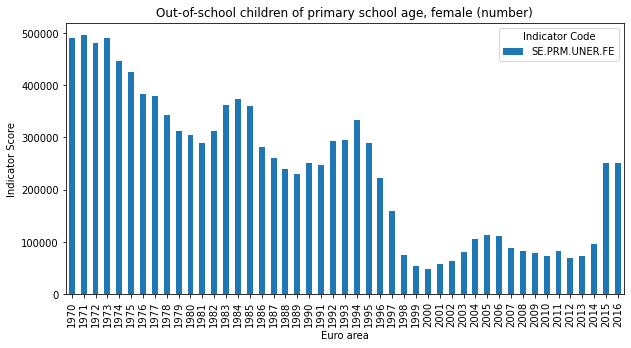

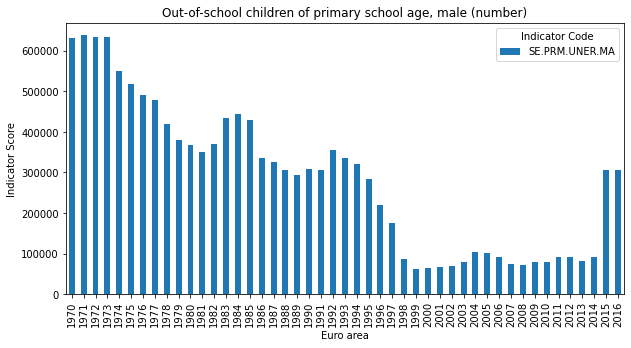

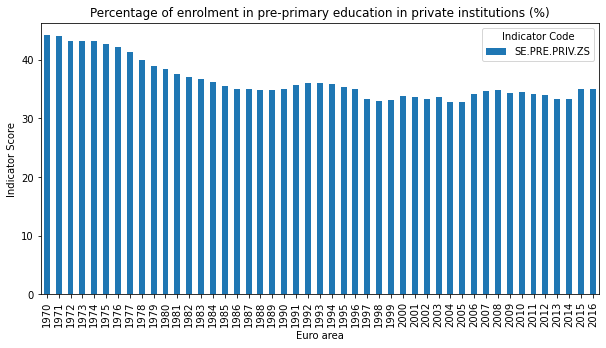

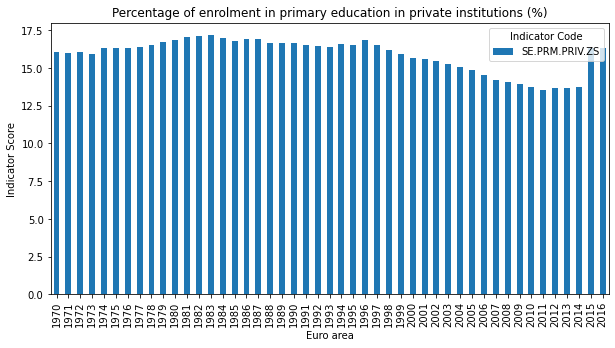

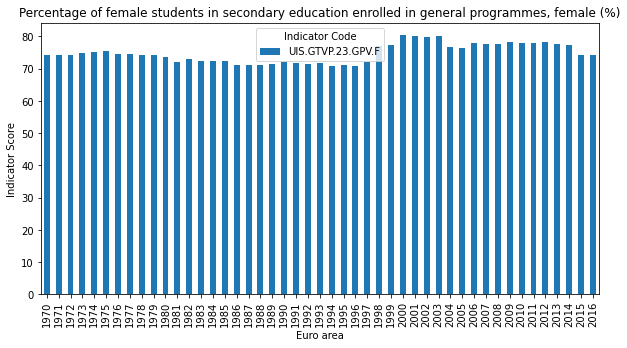

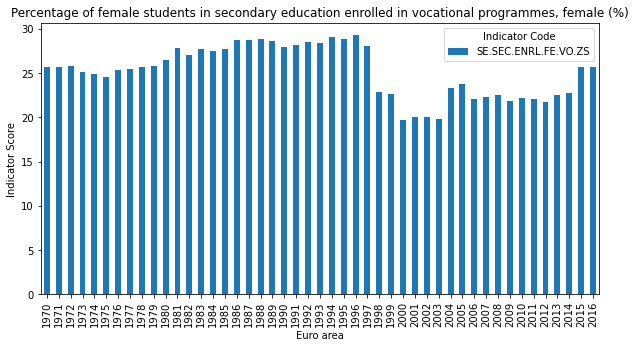

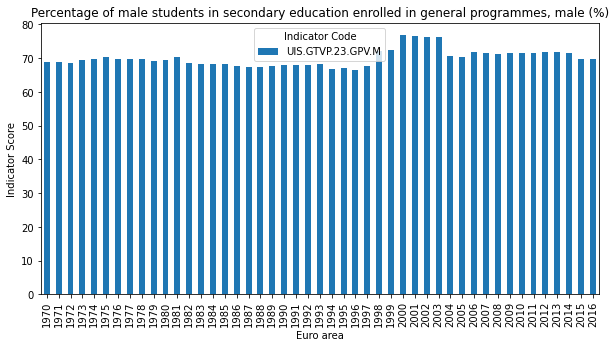

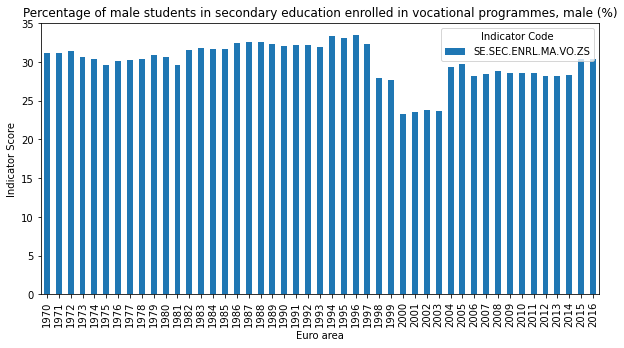

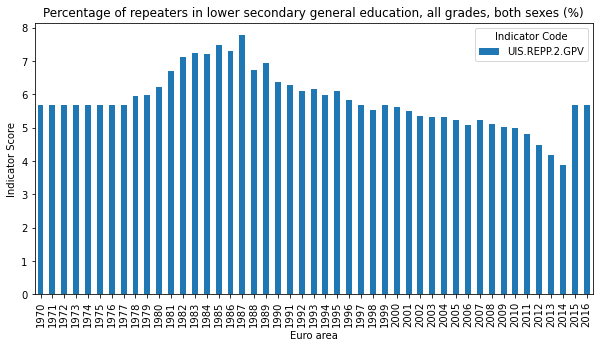

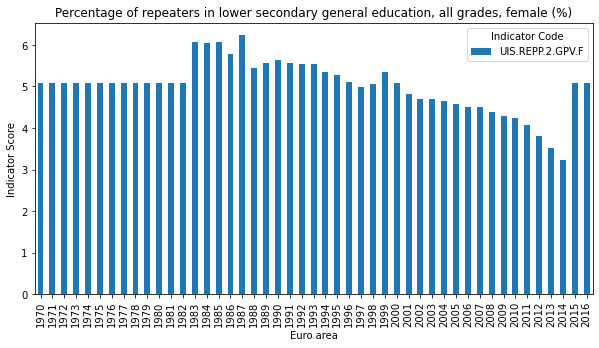

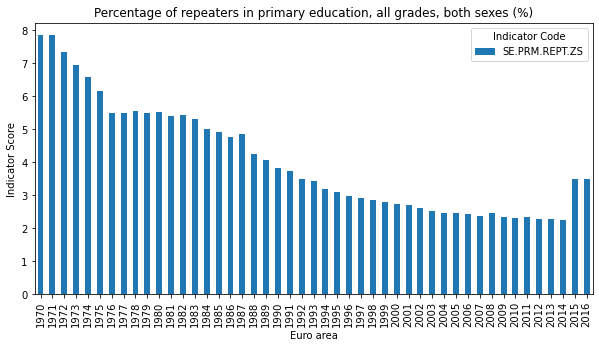

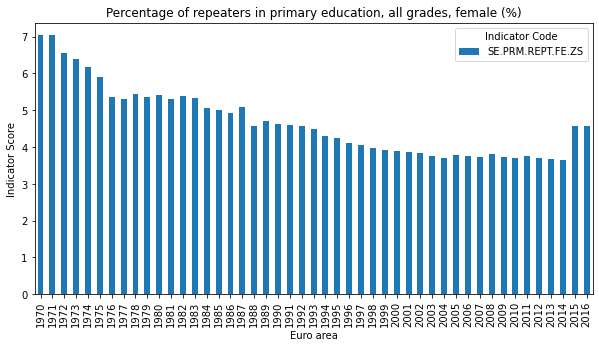

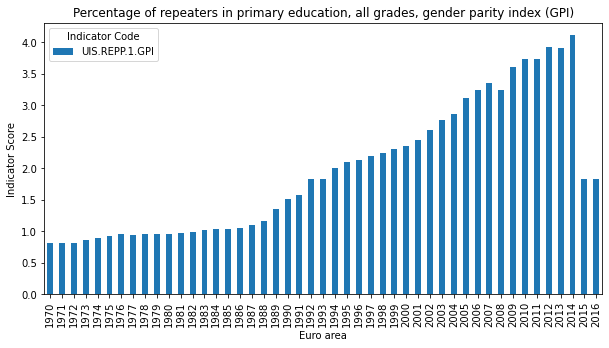

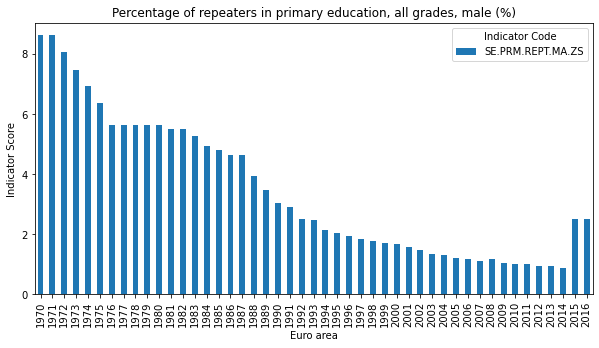

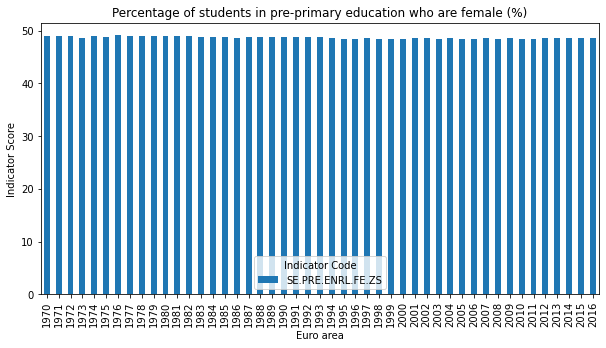

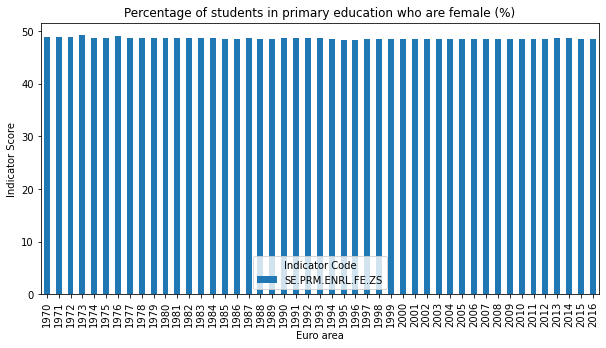

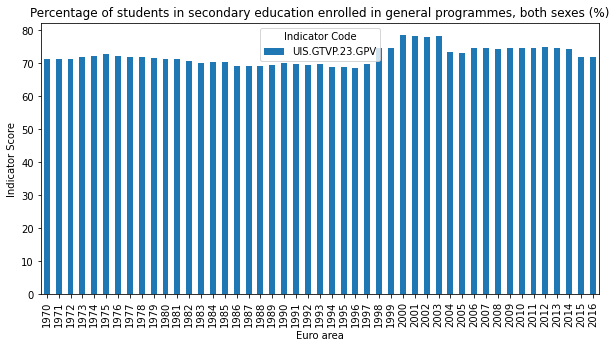

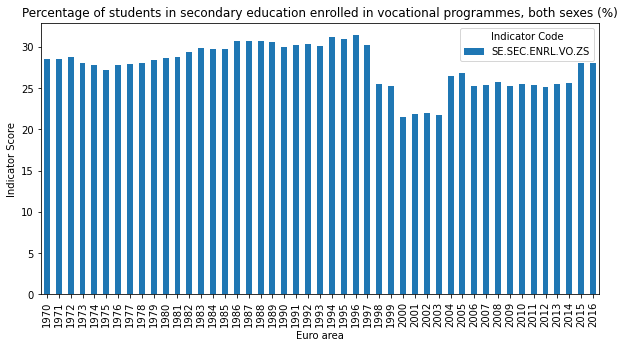

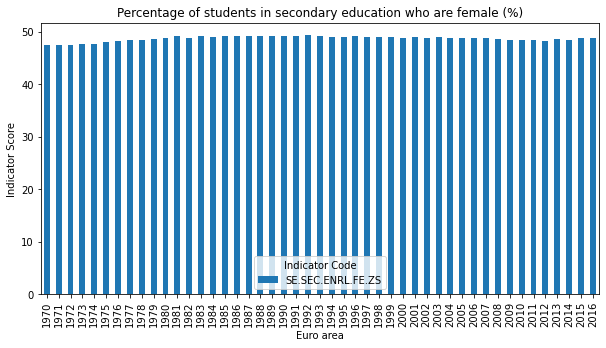

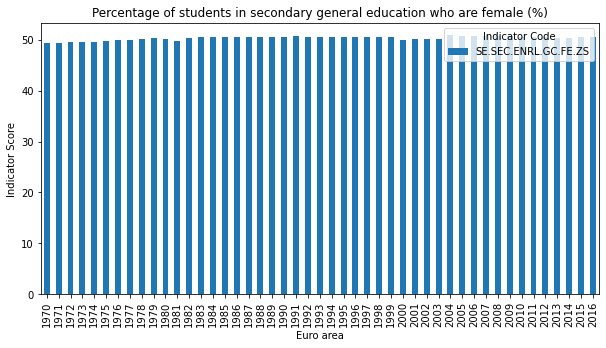

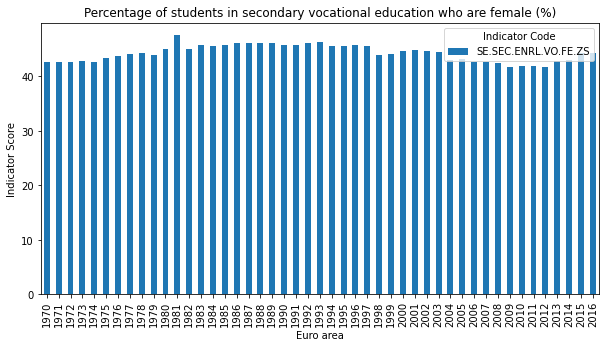

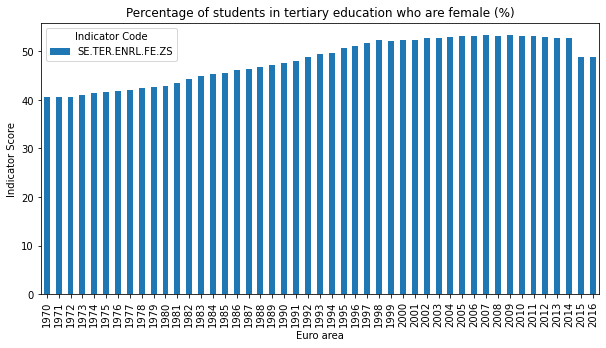

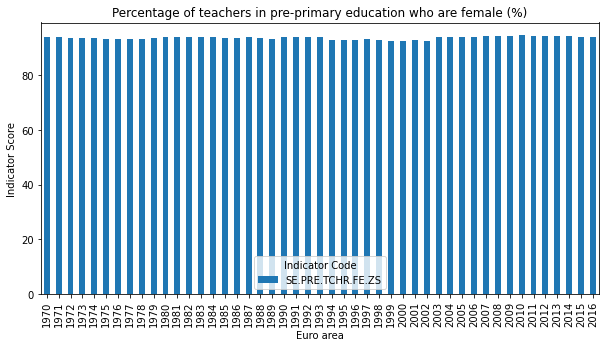

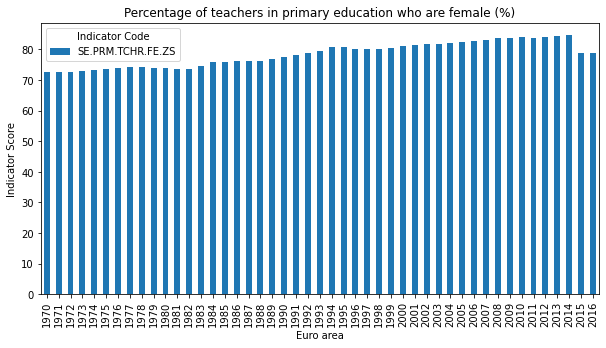

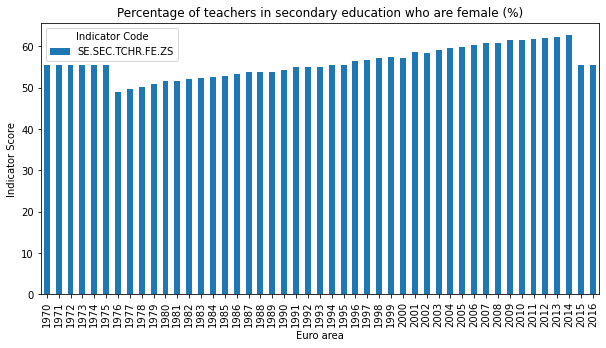

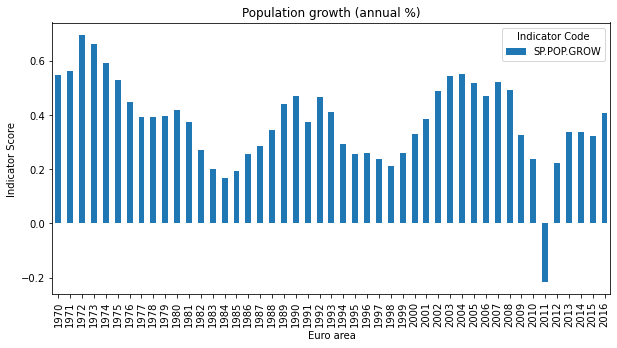

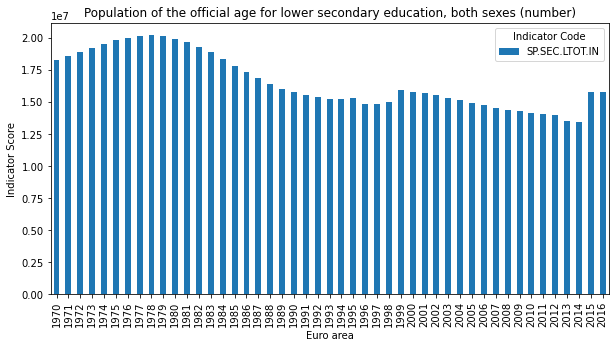

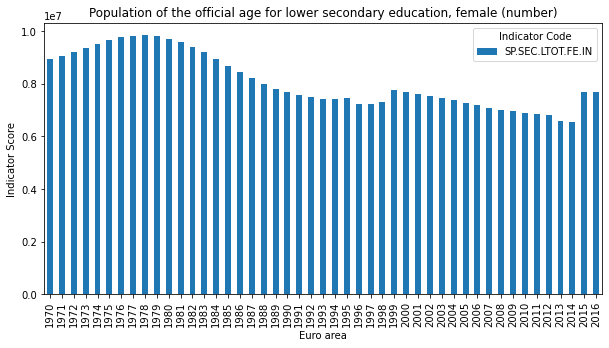

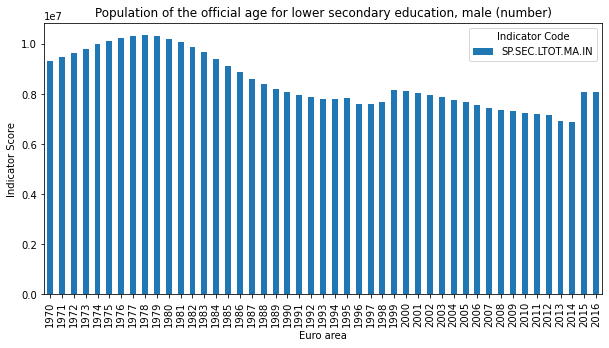

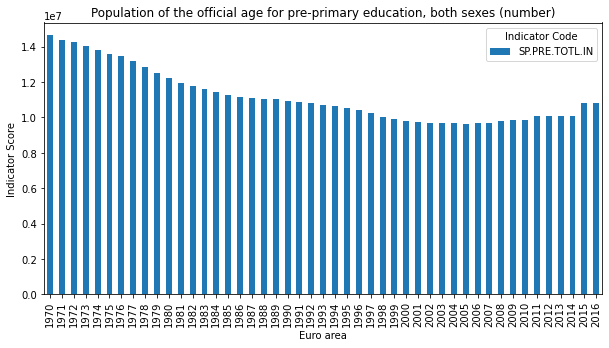

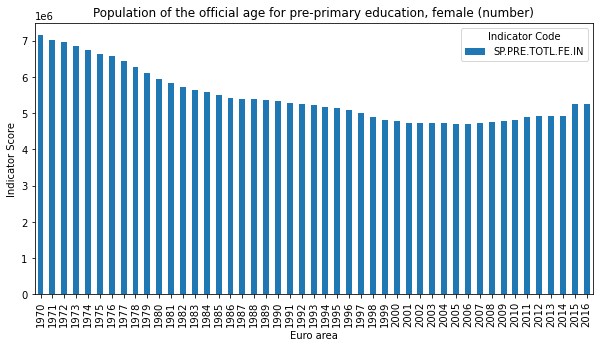

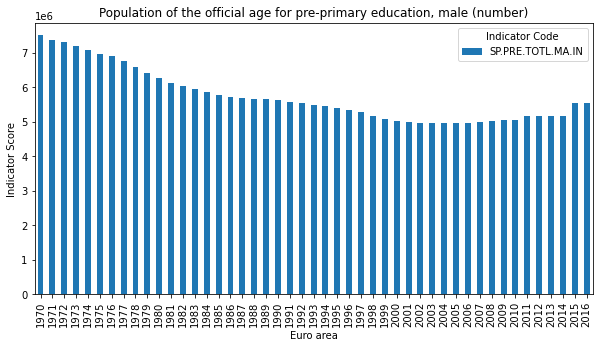

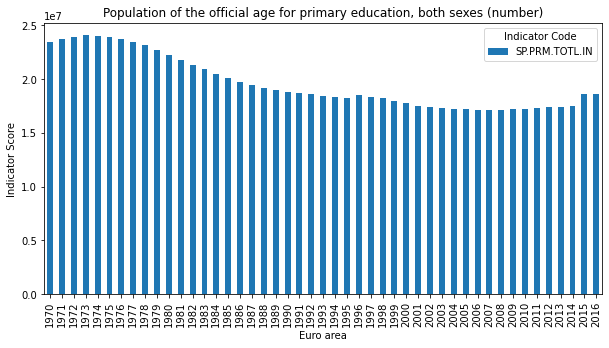

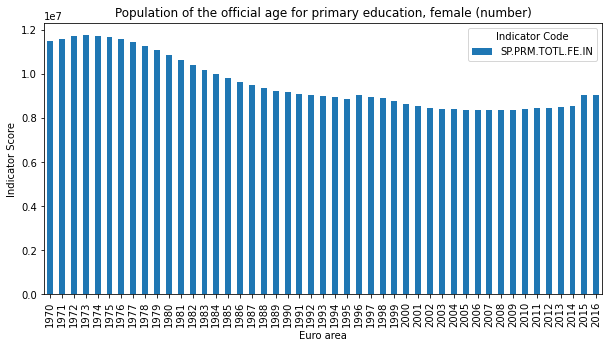

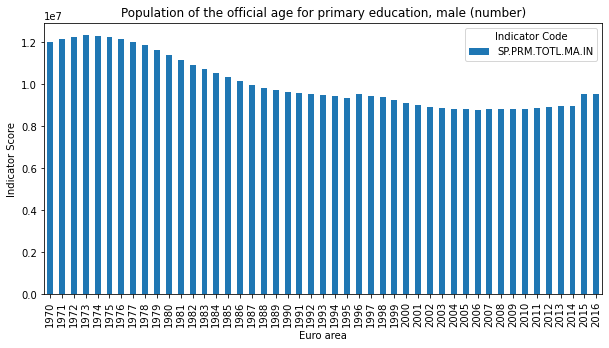

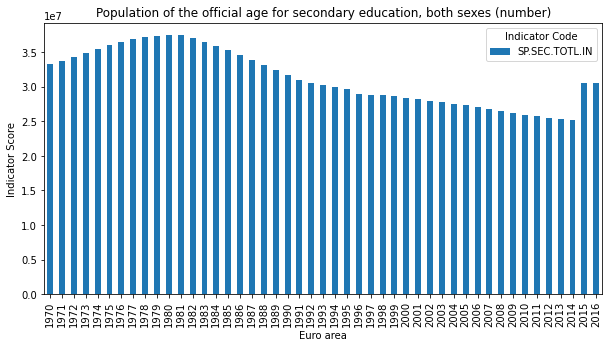

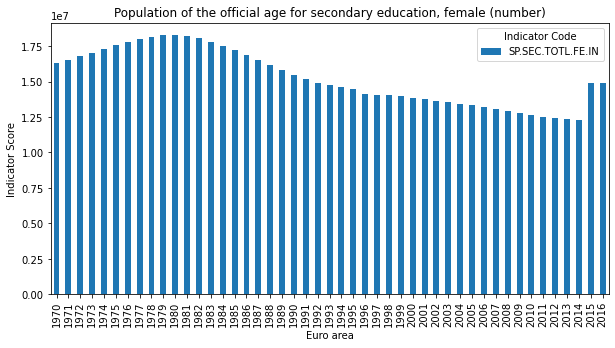

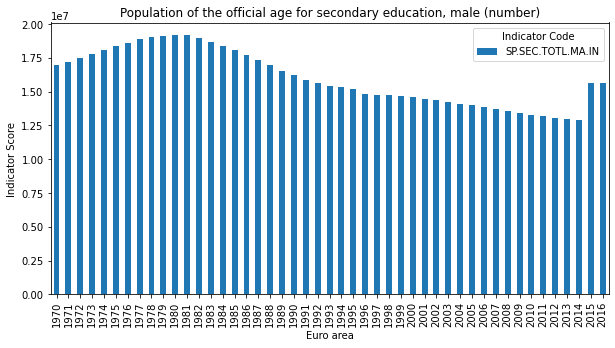

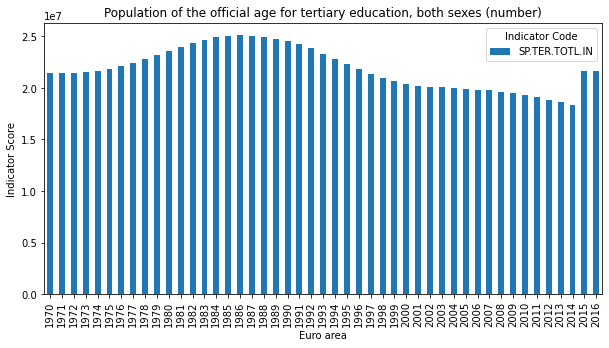

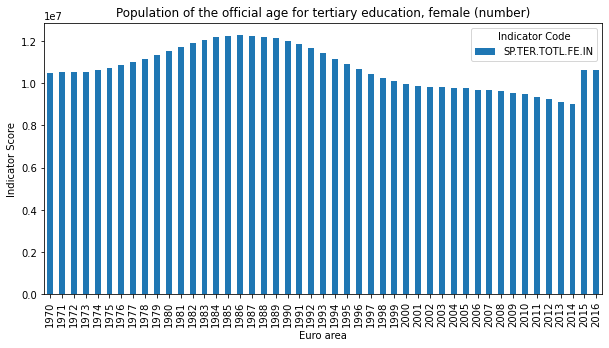

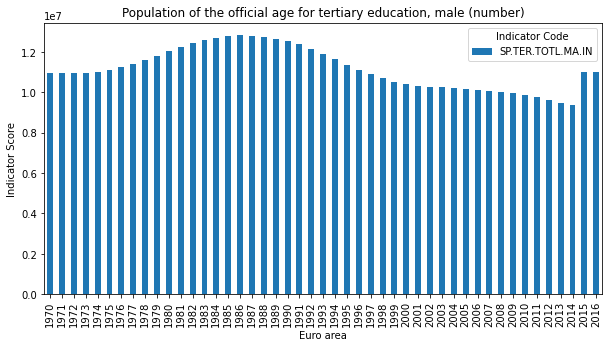

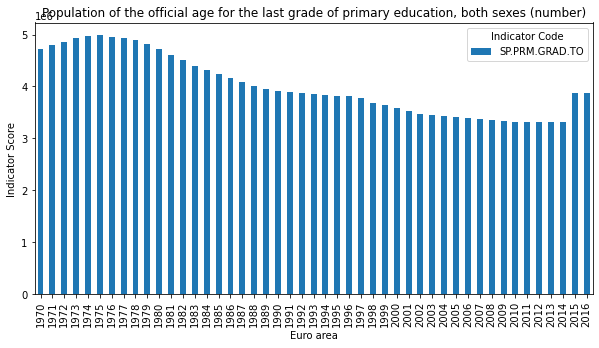

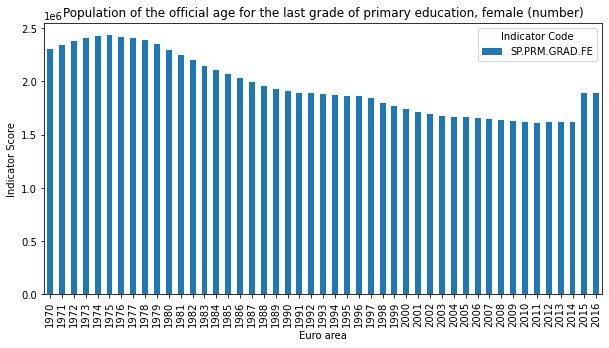

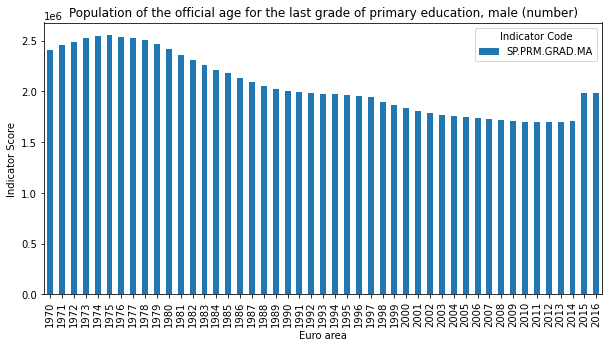

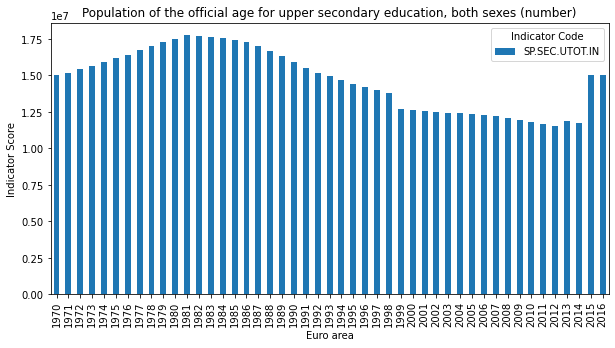

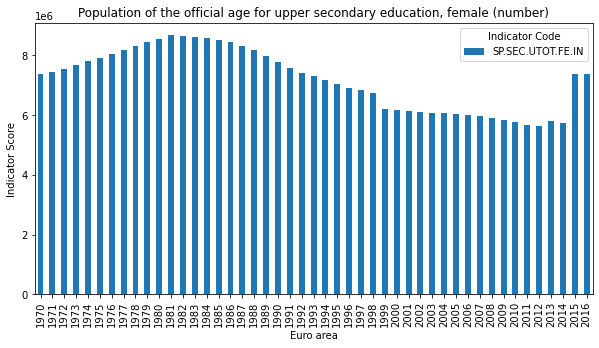

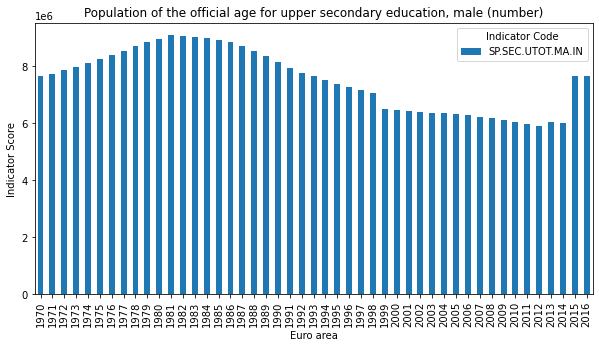

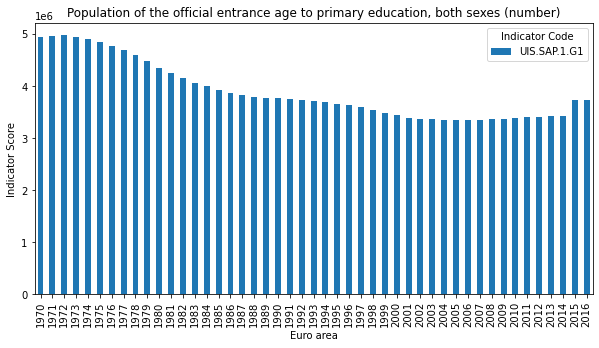

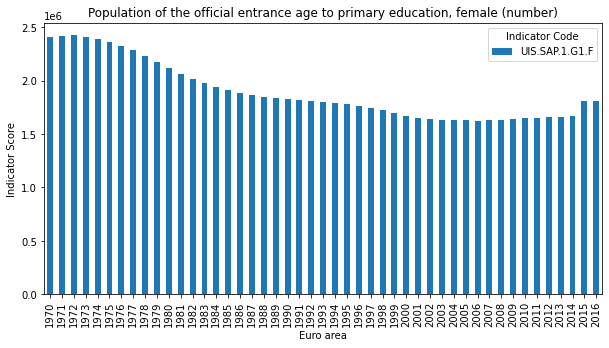

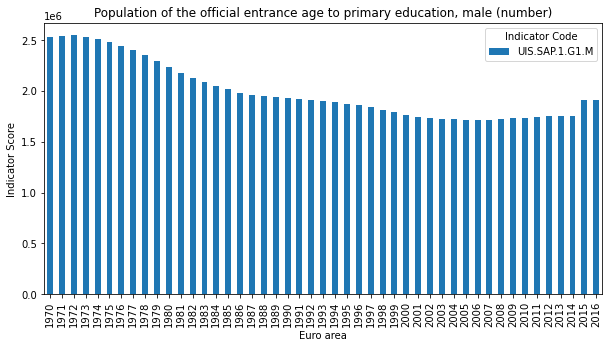

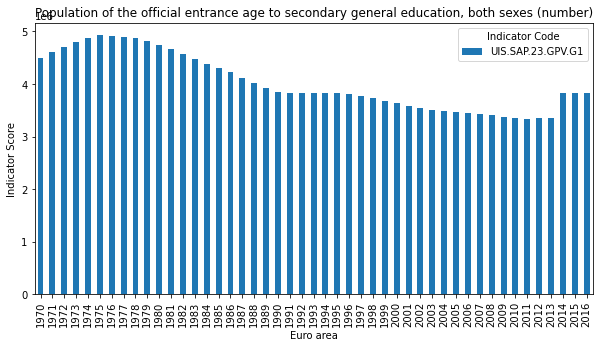

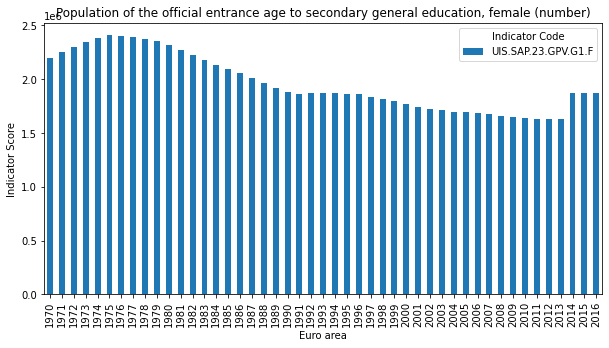

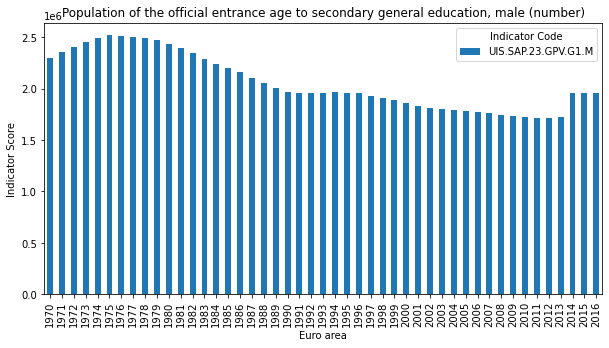

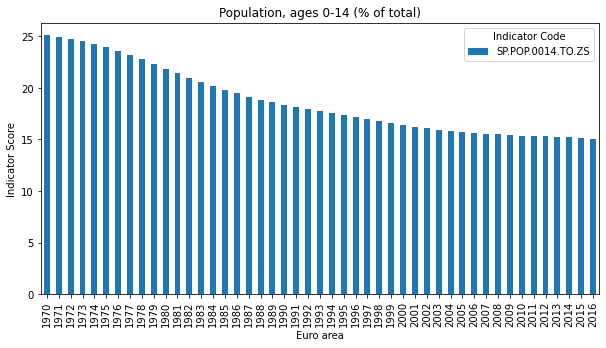

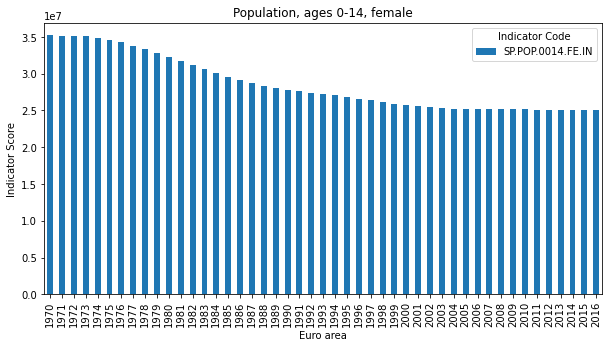

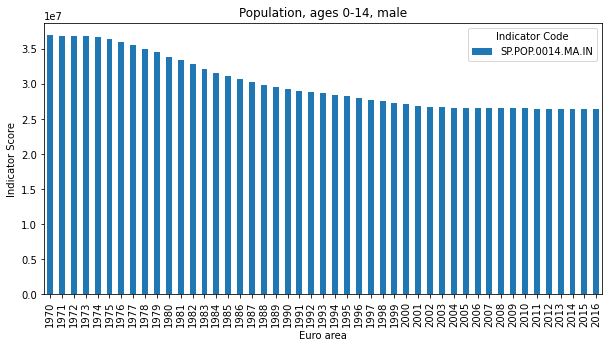

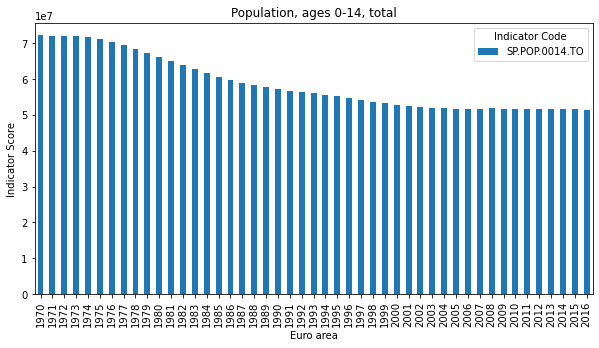

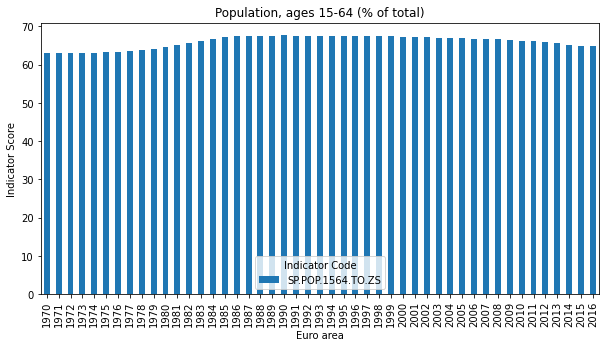

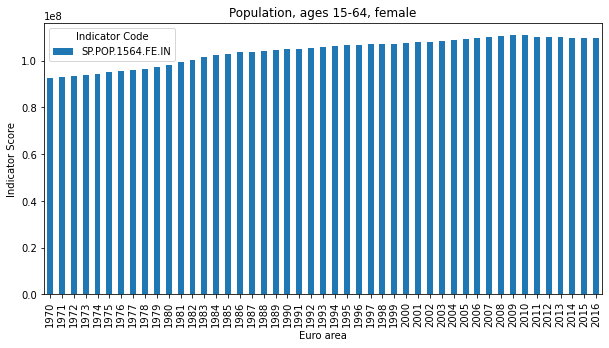

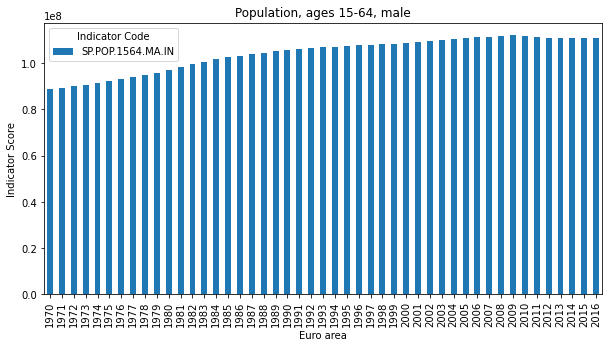

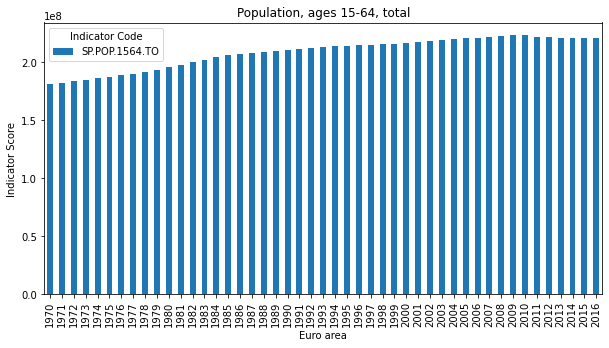

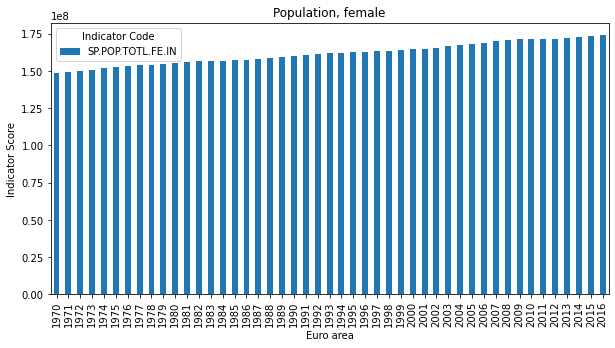

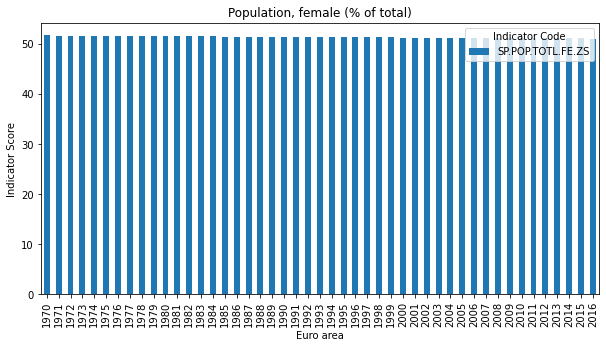

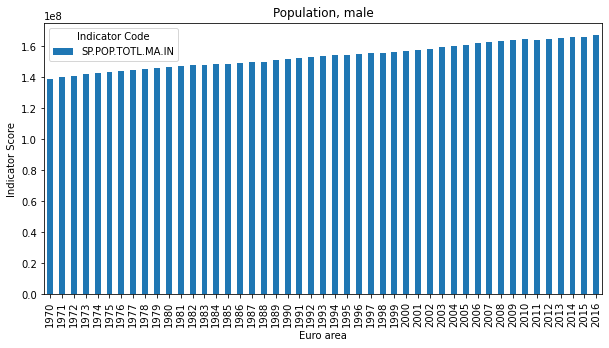

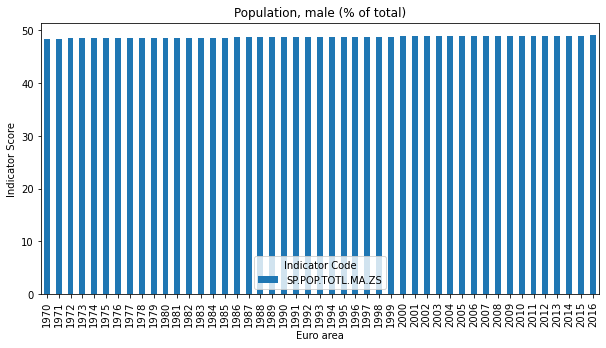

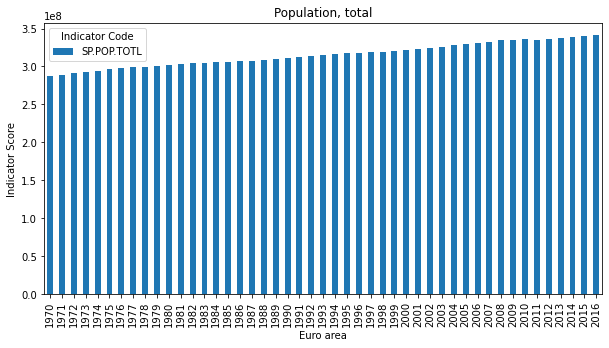

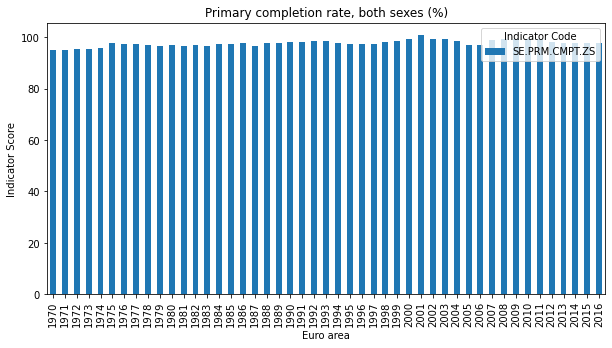

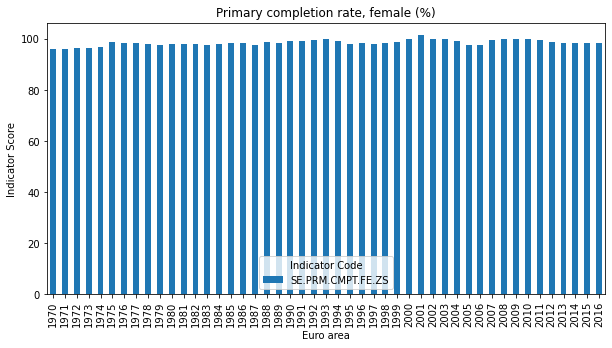

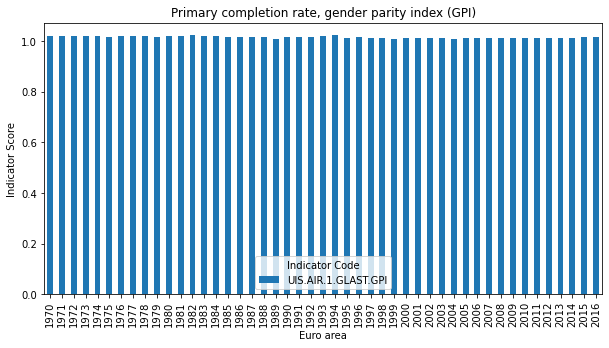

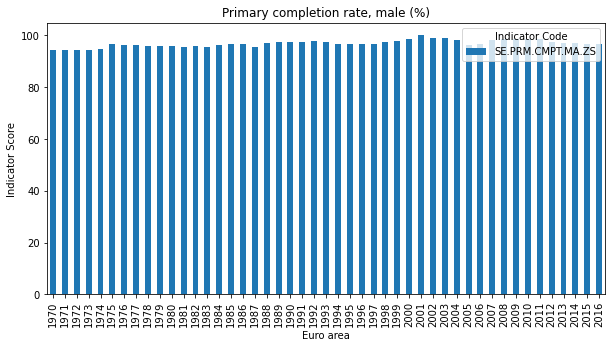

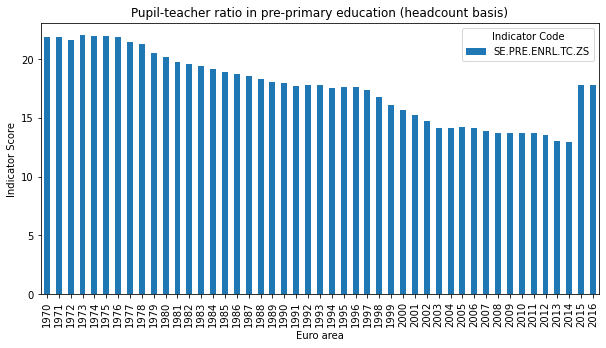

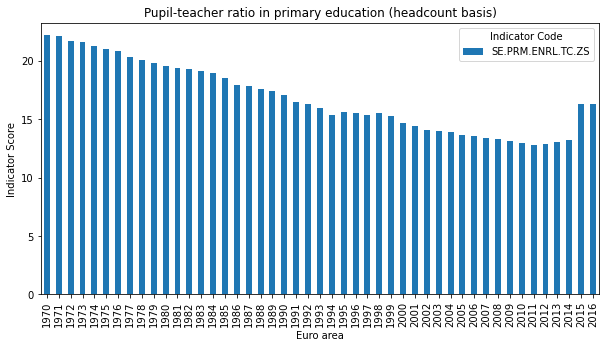

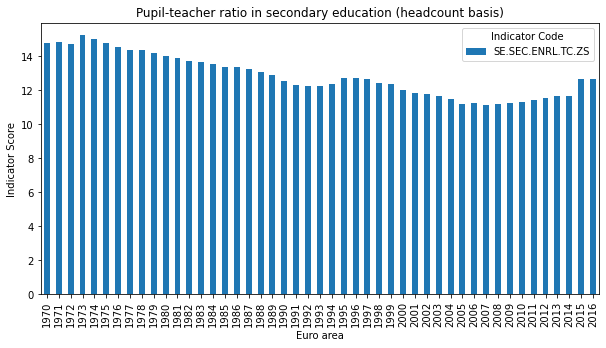

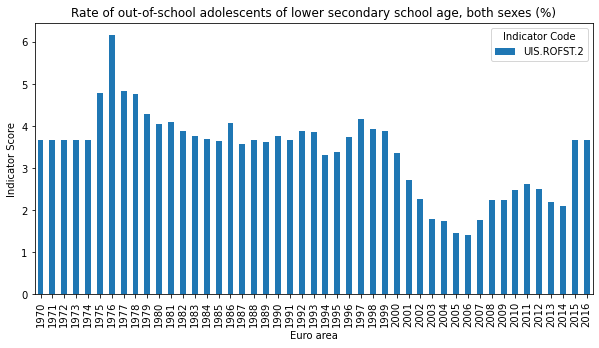

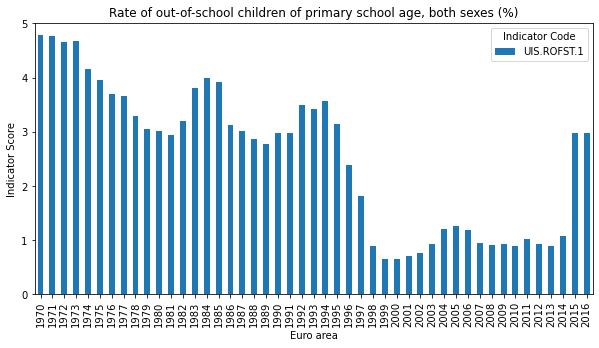

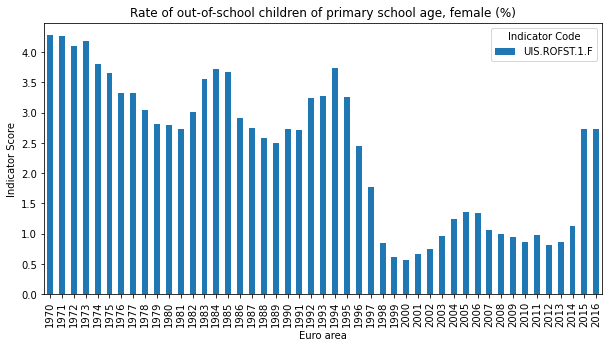

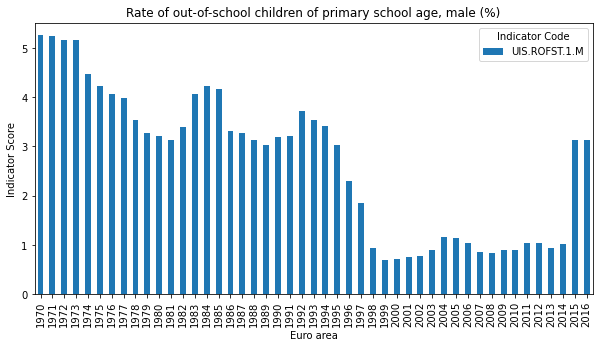

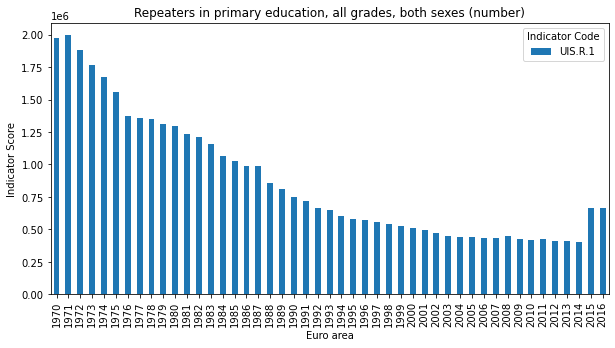

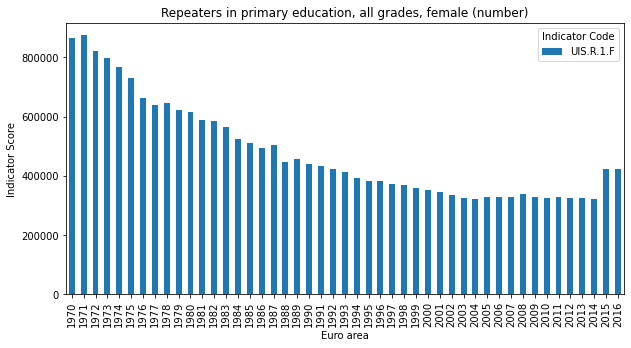

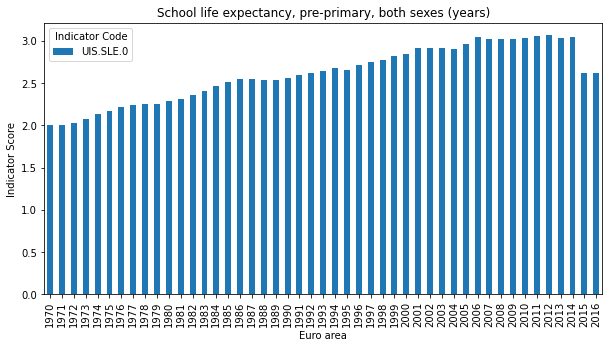

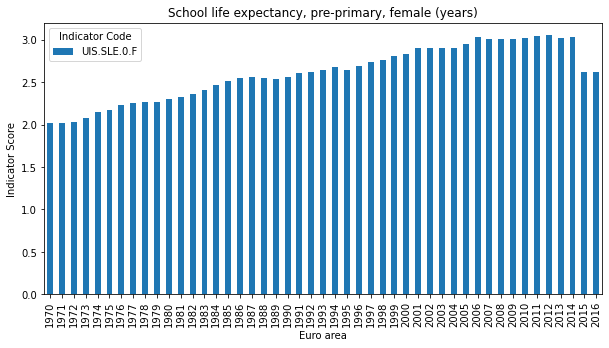

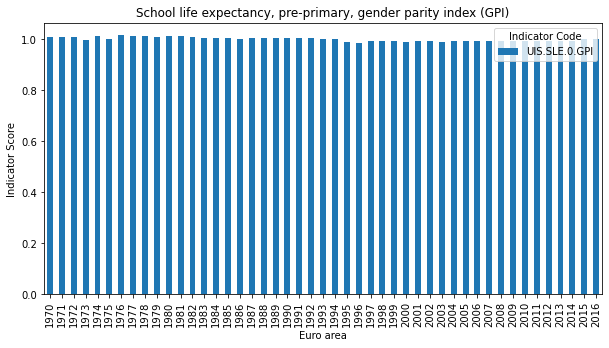

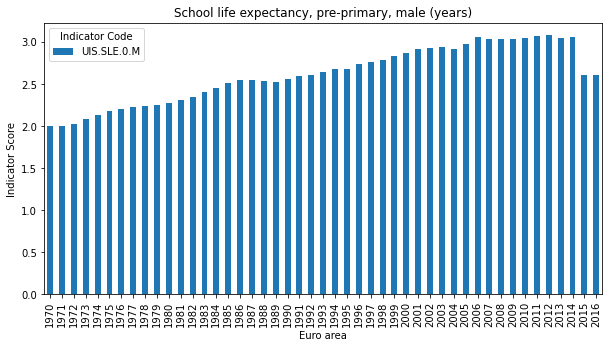

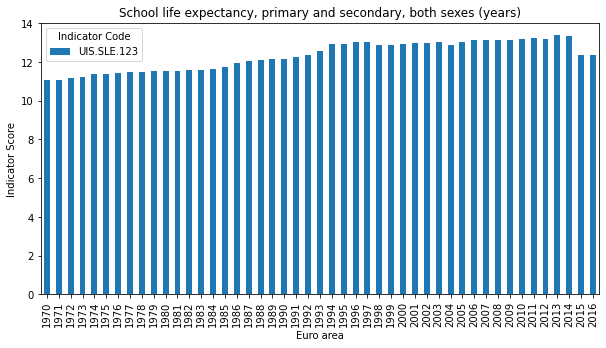

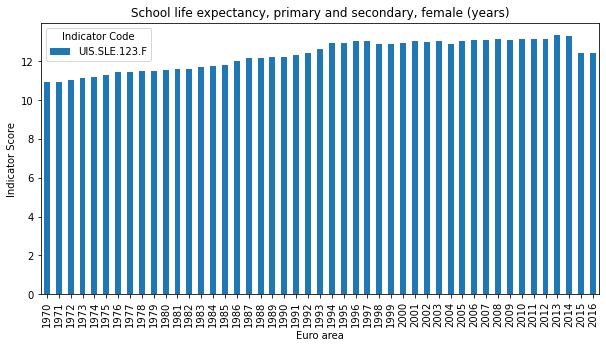

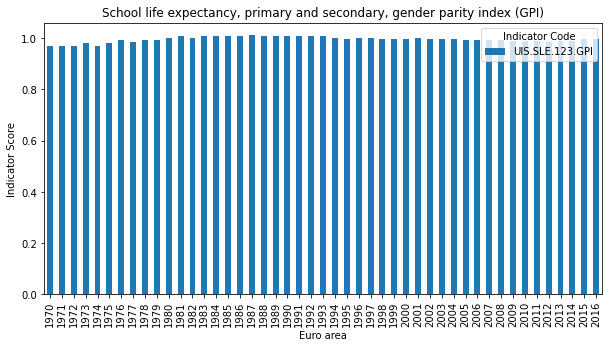

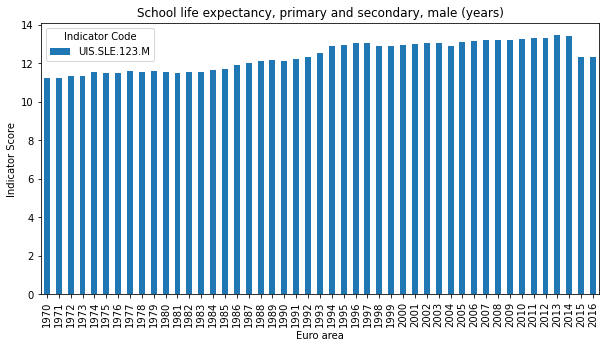

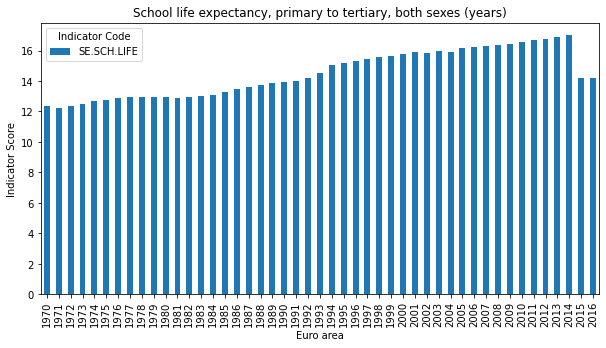

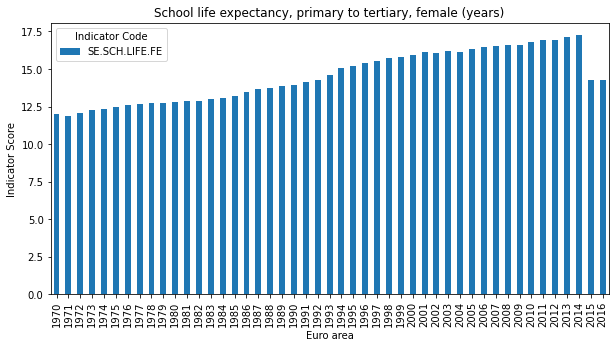

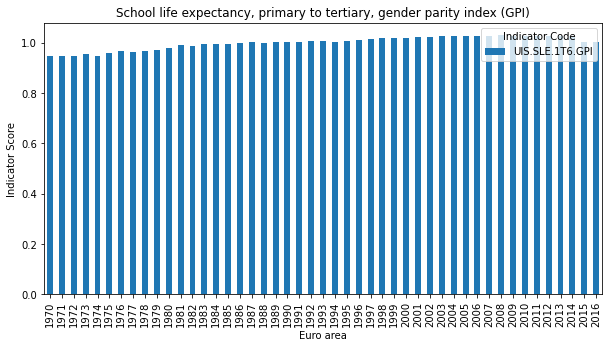

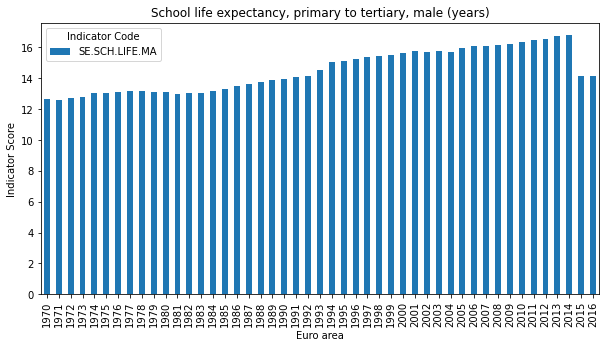

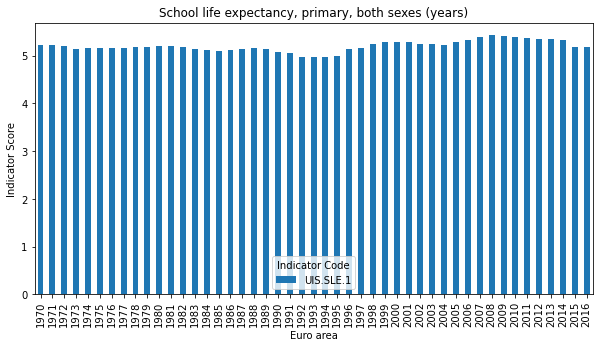

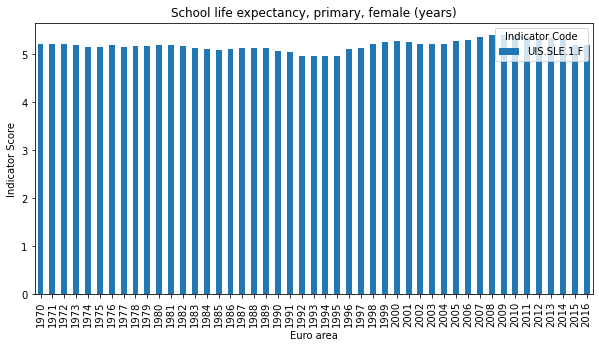

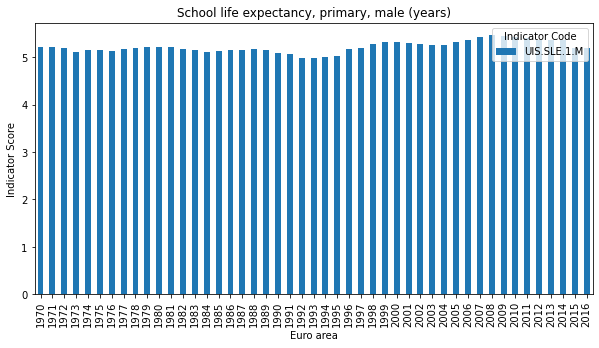

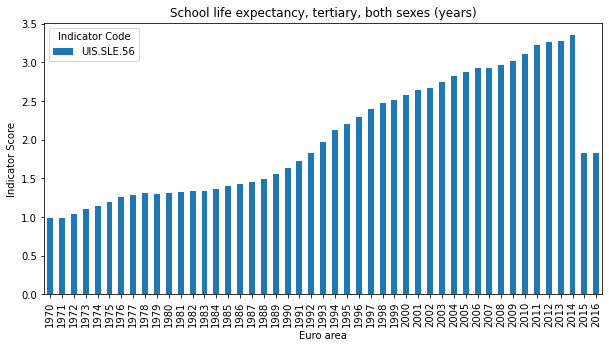

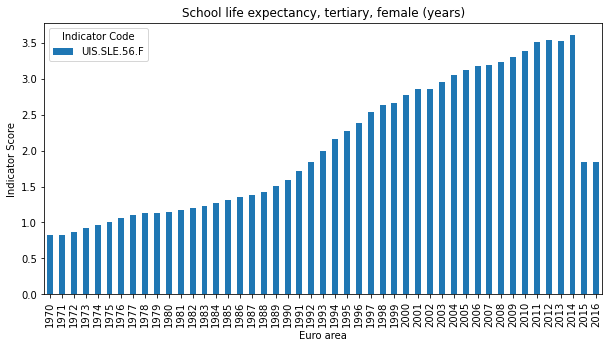

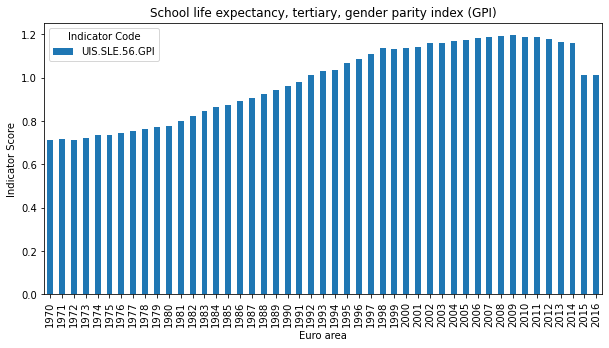

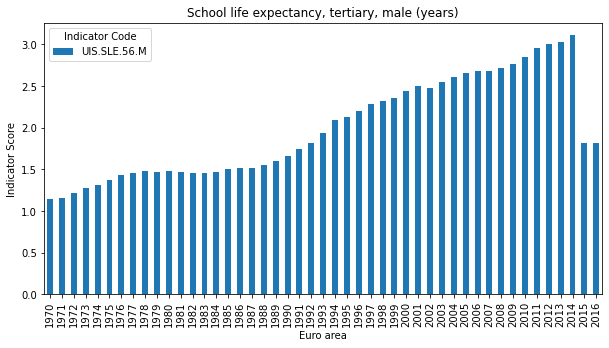

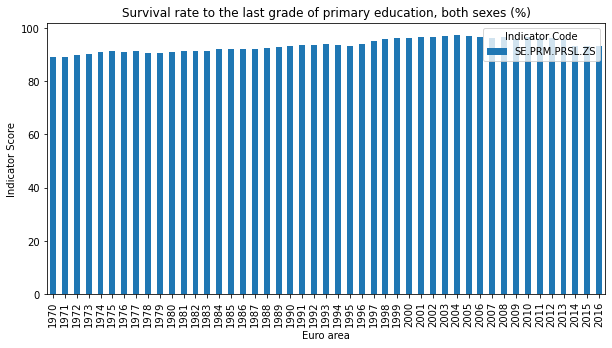

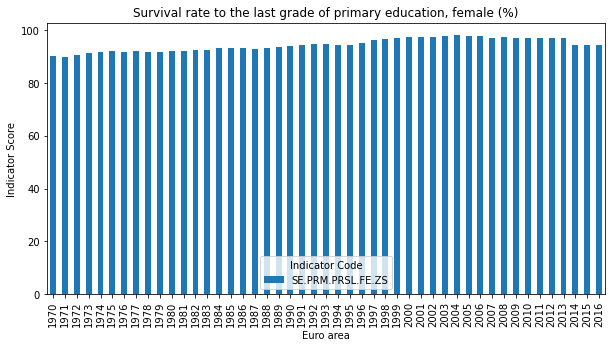

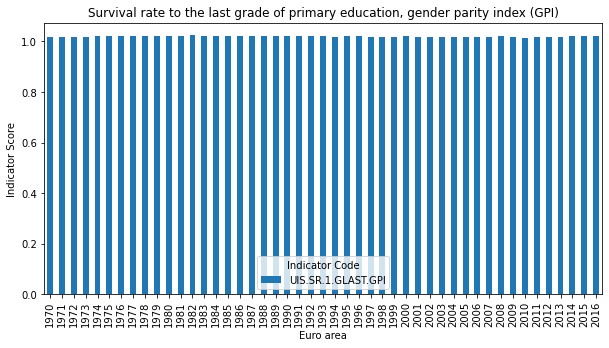

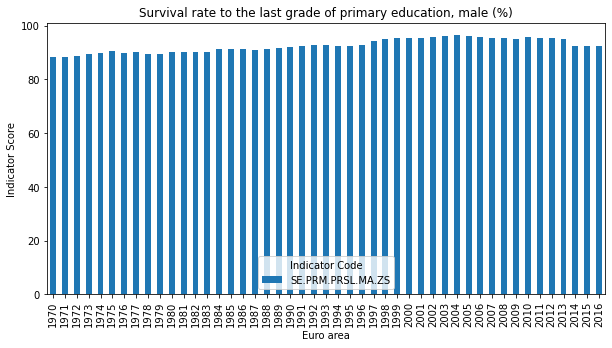

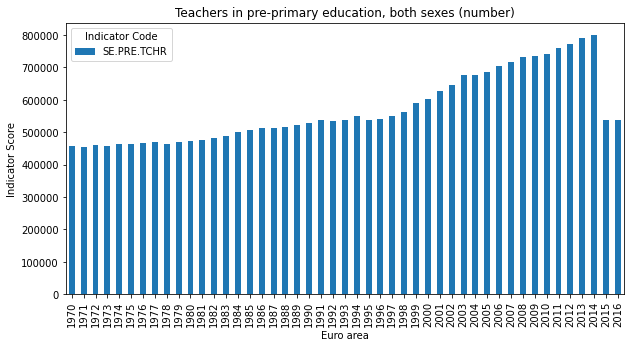

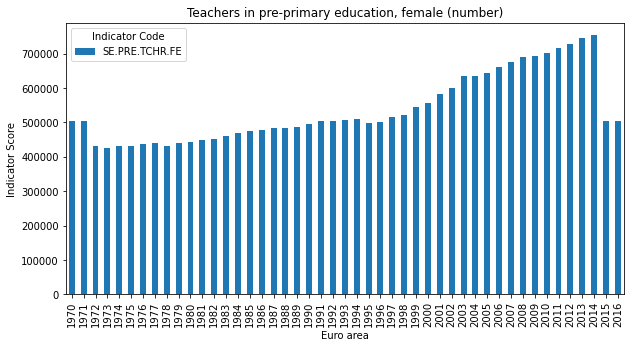

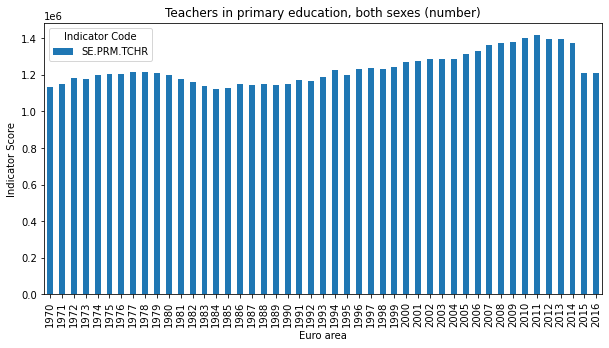

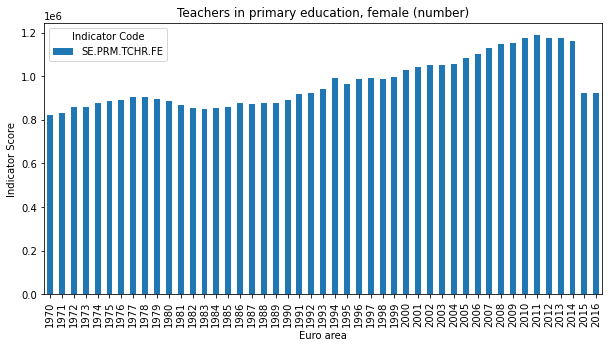

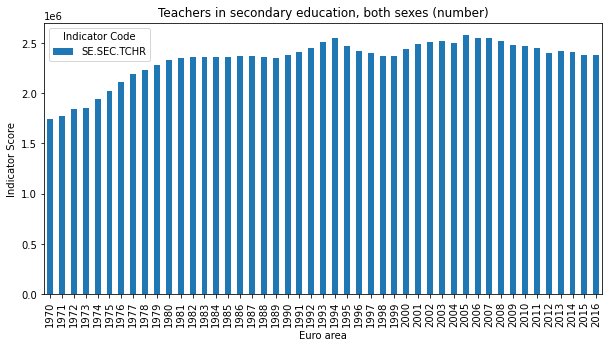

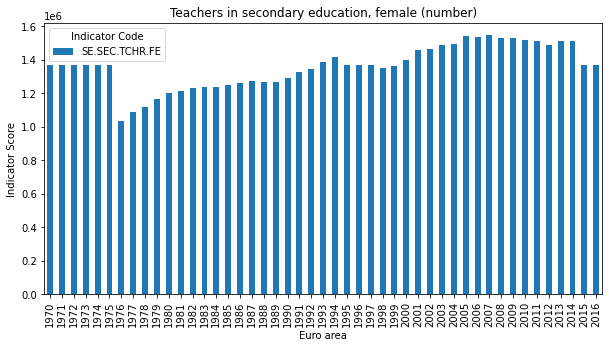

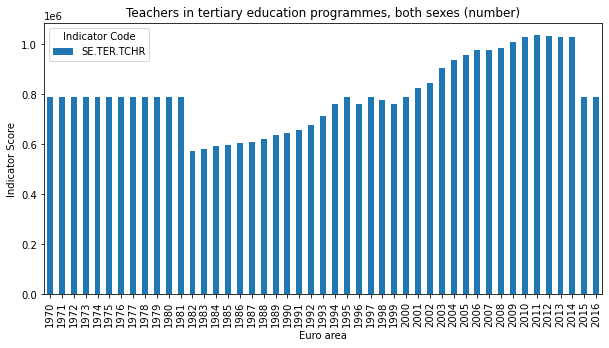

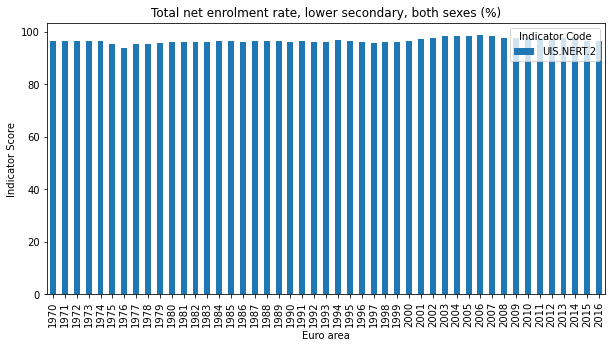

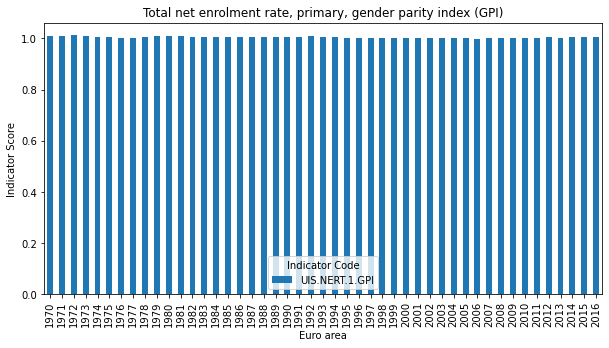

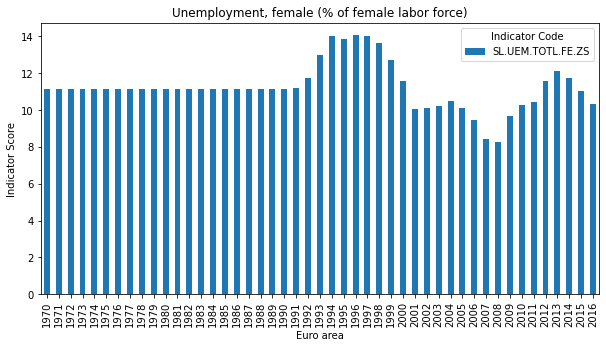

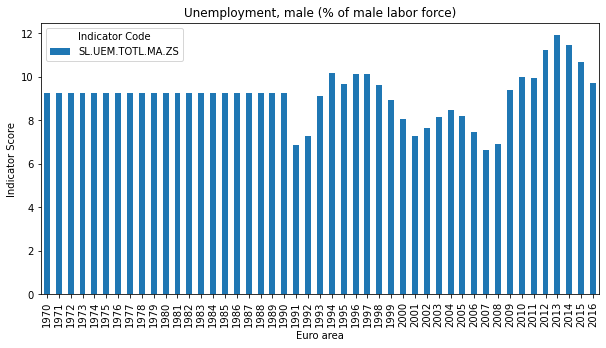

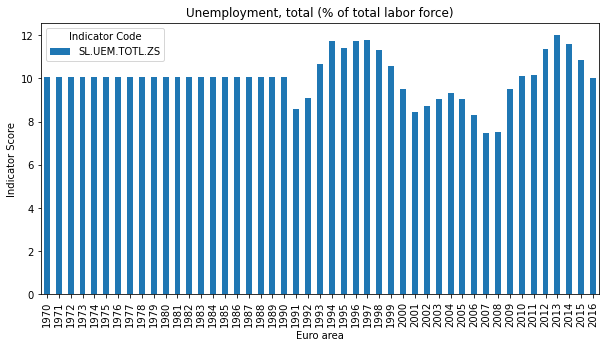

In [49]:
for column_name in dict_of_filtered_df.get('EMU').columns:
  dict_of_filtered_df.get('EMU').loc[:,[column_name]].plot.bar(figsize=(10,5))
  plt.title(dict_of_indicators.get(column_name))
  plt.ylabel('Indicator Score')
  plt.xlabel(dict_of_countries.get('EMU'))
  plt.show()

### **7. Conclusion from the Data**
